# <h1><center>PUC Minas - PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS</center></h1>

<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
TÍTULO:<br>
<br>
ALUNO: Wender Pereira Corrêa</h3>
Matrícula:
<p>Este notebook é referente ao Trabalho de Conclusão de Curso em Ciência de Dados e Big Data.</p>

#Leitura dos dados e importação das bibliotecas utilizadas

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
# dependências para importar e descompactar arquivos em zip
import zipfile
import requests
from io import BytesIO
import os
import glob
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
import time
#Importação da função Counter e da biblioteca matplotlib.pyplot
from collections import Counter
import matplotlib.pyplot as plt
#Plotação de um gráfico para mostrar a dispersão dos dados. 
#O % e inline significa que o gráfico será mostrado aqui no notebook, e não em um arquivo
%matplotlib inline

In [2]:
from io import StringIO 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Definindo a pasta de trabalho
dirCandidatoAnalise         = "./candidatoAnalise"
dirCandidatoCassacaoAnalise = "./candidatoCassacaoAnalise" 
 
os.makedirs(dirCandidatoAnalise, exist_ok=True)
os.makedirs(dirCandidatoCassacaoAnalise, exist_ok=True)

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}


In [5]:
def descompactar(nome_arquivo_compactado, diretorio):
    #Lê o arquivo compactado e extrai o conteúdo
    #print(nome_arquivo_compactado)
    filebytes = BytesIO(
        requests.get(nome_arquivo_compactado, stream=True, headers=headers).content
    )
    myzip = zipfile.ZipFile(filebytes)
    myzip.extractall(diretorio)
    return "Concluído"

<b>1) Dados Politicos</b>

In [6]:
ca = 2014
while ca < 2022:
    urlCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_" + str(ca)+ ".zip"
    descompactar(urlCandidatoAnalise,dirCandidatoAnalise)
    urlCandidatoCassacaoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_" + str(ca)+ ".zip"
    descompactar(urlCandidatoCassacaoAnalise,dirCandidatoCassacaoAnalise)
    ca+=2

<b>1) Dados Candidato</b>

In [7]:
print('Arquivos com extensão csv Candidato:')
concatenar = []
with os.scandir(dirCandidatoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame = pd.DataFrame()
    content = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        df = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', 
            error_bad_lines=False,dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int,"SG_UF" : "string", "NR_TURNO": int,"HH_GERACAO" : object ,"CD_TIPO_ELEICAO" : int,"NM_TIPO_ELEICAO" : "string","CD_ELEICAO" : "string","DS_ELEICAO" :"string","TP_ABRANGENCIA" : "string","SG_UE" : "string","NM_UE" : "string","CD_CARGO" : int,"DS_CARGO" : "string","NR_CANDIDATO" : int,"NM_CANDIDATO" : "string","NM_URNA_CANDIDATO" : "string","NM_SOCIAL_CANDIDATO" : "string","NR_CPF_CANDIDATO" : "string","NM_EMAIL" : "string","CD_SITUACAO_CANDIDATURA" : "string","DS_SITUACAO_CANDIDATURA" : "string","CD_DETALHE_SITUACAO_CAND" : "string","DS_DETALHE_SITUACAO_CAND" : "string","TP_AGREMIACAO" : "string","NR_PARTIDO" : int,"SG_PARTIDO" : "string","NM_PARTIDO" : "string","SQ_COLIGACAO" : "string","NM_COLIGACAO" : "string","DS_COMPOSICAO_COLIGACAO" : "string","CD_NACIONALIDADE" : int,"DS_NACIONALIDADE" : "string","SG_UF_NASCIMENTO" : "string","CD_MUNICIPIO_NASCIMENTO" : "string","NM_MUNICIPIO_NASCIMENTO" : "string","DT_NASCIMENTO" : "string","NR_IDADE_DATA_POSSE" : float ,"NR_TITULO_ELEITORAL_CANDIDATO" : "string","CD_GENERO" : int,"DS_GENERO" : "string","CD_GRAU_INSTRUCAO" : int,"DS_GRAU_INSTRUCAO" : "string","CD_ESTADO_CIVIL" : int,"DS_ESTADO_CIVIL" : "string","CD_OCUPACAO" : "string", "DS_OCUPACAO" : "string","VR_DESPESA_MAX_CAMPANHA" : "string","CD_SIT_TOT_TURNO" : "string","DS_SIT_TOT_TURNO" : "string","ST_REELEICAO" : "string","ST_DECLARAR_BENS" : "string","NR_PROTOCOLO_CANDIDATURA" : "string","NR_PROCESSO" : "string" ,"CD_SITUACAO_CANDIDATO_PLEITO" : "string","DS_SITUACAO_CANDIDATO_PLEITO" : "string","CD_SITUACAO_CANDIDATO_URNA" : "string", "DS_SITUACAO_CANDIDATO_URNA" : "string","ST_CANDIDATO_INSERIDO_URNA" : "string"})
        df.drop_duplicates()
        content.append(df)
    # converting content to data frame
    data_frame = pd.concat(content).drop_duplicates()

Arquivos com extensão csv Candidato:
consulta_cand_2014_AC.csv
consulta_cand_2014_AL.csv
consulta_cand_2014_AM.csv
consulta_cand_2014_AP.csv
consulta_cand_2014_BA.csv
consulta_cand_2014_BR.csv
consulta_cand_2014_BRASIL.csv
consulta_cand_2014_CE.csv
consulta_cand_2014_DF.csv
consulta_cand_2014_ES.csv
consulta_cand_2014_GO.csv
consulta_cand_2014_MA.csv
consulta_cand_2014_MG.csv
consulta_cand_2014_MS.csv
consulta_cand_2014_MT.csv
consulta_cand_2014_PA.csv
consulta_cand_2014_PB.csv
consulta_cand_2014_PE.csv
consulta_cand_2014_PI.csv
consulta_cand_2014_PR.csv
consulta_cand_2014_RJ.csv
consulta_cand_2014_RN.csv
consulta_cand_2014_RO.csv
consulta_cand_2014_RR.csv
consulta_cand_2014_RS.csv
consulta_cand_2014_SC.csv
consulta_cand_2014_SE.csv
consulta_cand_2014_SP.csv
consulta_cand_2014_TO.csv
consulta_cand_2016_AC.csv
consulta_cand_2016_AL.csv
consulta_cand_2016_AM.csv
consulta_cand_2016_AP.csv
consulta_cand_2016_BA.csv
consulta_cand_2016_BRASIL.csv
consulta_cand_2016_CE.csv
consulta_cand_2016_

In [8]:
data_frame

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558314,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,06001439720206130088,2,DEFERIDO,2,DEFERIDO,SIM
558315,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06000795020206100095,2,DEFERIDO,2,DEFERIDO,SIM
558316,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,06000383520206150066,2,DEFERIDO,2,DEFERIDO,SIM
558317,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,06002418120206190196,2,DEFERIDO,2,DEFERIDO,SIM


In [9]:
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

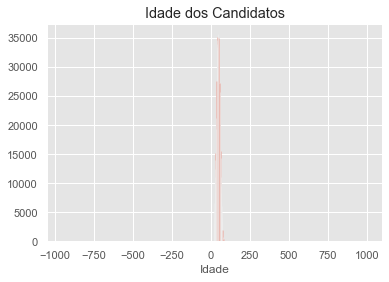

In [10]:
idade_publico = Counter(data_frame['NR_IDADE_DATA_POSSE'])
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_publico.keys(), idade_publico.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos')
plt.show()

In [11]:
categorical_columns_df = [cname for cname in data_frame.columns if data_frame[cname].dtype == "object"]
categorical_columns_df

['DT_GERACAO', 'HH_GERACAO', 'DT_ELEICAO', 'DS_COR_RACA']

In [12]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame.isna().sum()
porc_ausentes = data_frame.isna().sum() * 100 / len(data_frame)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
...,...,...,...
CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_PLEITO,0,0.0
DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,0,0.0
CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_URNA,0,0.0
DS_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,0,0.0


In [13]:
#imprimindo as primeiras linhas
display(data_frame.head())
# Imprimindo as últimas linhas
display(data_frame.tail())
# Informações do nosso DataFrame
data_frame.describe()
# Dimensões do df_dados
data_frame.shape

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
558314,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,06001439720206130088,2,DEFERIDO,2,DEFERIDO,SIM
558315,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06000795020206100095,2,DEFERIDO,2,DEFERIDO,SIM
558316,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,06000383520206150066,2,DEFERIDO,2,DEFERIDO,SIM
558317,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,06002418120206190196,2,DEFERIDO,2,DEFERIDO,SIM
558318,09/06/2022,10:09:00,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,06002202020206260129,2,DEFERIDO,2,DEFERIDO,SIM


(1112111, 63)

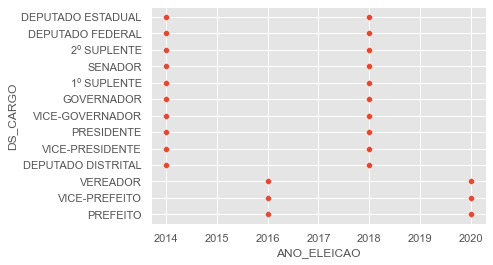

<Figure size 1152x576 with 0 Axes>

In [14]:
res = sns.scatterplot(x=data_frame['ANO_ELEICAO'],y=data_frame['DS_CARGO'])
fig = plt.figure(figsize=(16,8))
plt.show()

In [15]:
data_frame.values

array([['08/04/2021', '11:38:25', 2014, ..., '2', 'DEFERIDO', 'SIM'],
       ['08/04/2021', '11:38:25', 2014, ..., '2', 'DEFERIDO', 'SIM'],
       ['08/04/2021', '11:38:25', 2014, ..., '2', 'DEFERIDO', 'SIM'],
       ...,
       ['09/06/2022', '10:09:00', 2020, ..., '2', 'DEFERIDO', 'SIM'],
       ['09/06/2022', '10:09:00', 2020, ..., '2', 'DEFERIDO', 'SIM'],
       ['09/06/2022', '10:09:00', 2020, ..., '2', 'DEFERIDO', 'SIM']],
      dtype=object)

In [16]:
data_frame.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [17]:
data_frame.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            558309, 558310, 558311, 558312, 558313, 558314, 558315, 558316,
            558317, 558318],
           dtype='int64', length=1112111)

<b> Matriz de correlação de atributos </b>

Text(-23.500000000000007, 0.5, 'características do núcleo da célula')

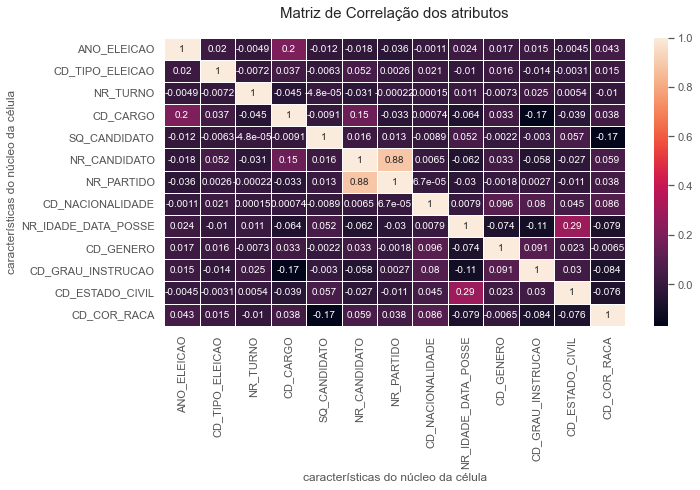

In [18]:
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = data_frame.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

<b> 2 - Dados Cassação </b>

In [19]:
print('Arquivos com extensão csv Cassação:')
concatenar = []
with os.scandir(dirCandidatoCassacaoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoCassacaoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_cassacao = pd.DataFrame()
    content_situacao = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfs = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao.append(dfs)
    # converting content to data frame
    data_frame_cassacao = pd.concat(content_situacao).drop_duplicates()

Arquivos com extensão csv Cassação:
motivo_cassacao_2014_AC.csv
motivo_cassacao_2014_AL.csv
motivo_cassacao_2014_AM.csv
motivo_cassacao_2014_AP.csv
motivo_cassacao_2014_BA.csv
motivo_cassacao_2014_BR.csv
motivo_cassacao_2014_BRASIL.csv
motivo_cassacao_2014_CE.csv
motivo_cassacao_2014_DF.csv
motivo_cassacao_2014_ES.csv
motivo_cassacao_2014_GO.csv
motivo_cassacao_2014_MA.csv
motivo_cassacao_2014_MG.csv
motivo_cassacao_2014_MS.csv
motivo_cassacao_2014_MT.csv
motivo_cassacao_2014_PA.csv
motivo_cassacao_2014_PB.csv
motivo_cassacao_2014_PE.csv
motivo_cassacao_2014_PI.csv
motivo_cassacao_2014_PR.csv
motivo_cassacao_2014_RJ.csv
motivo_cassacao_2014_RN.csv
motivo_cassacao_2014_RO.csv
motivo_cassacao_2014_RR.csv
motivo_cassacao_2014_RS.csv
motivo_cassacao_2014_SC.csv
motivo_cassacao_2014_SE.csv
motivo_cassacao_2014_SP.csv
motivo_cassacao_2014_TO.csv
motivo_cassacao_2016_AC.csv
motivo_cassacao_2016_AL.csv
motivo_cassacao_2016_AM.csv
motivo_cassacao_2016_AP.csv
motivo_cassacao_2016_BA.csv
motivo_c

In [20]:
data_frame_cassacao

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
0,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306401,Ausência de requisito de registro
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306408,Ficha limpa (LC 64/90)
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929209,Ausência de requisito de registro
2,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929208,Ausência de requisito de registro
3,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929203,Ausência de requisito de registro
...,...,...,...,...,...,...,...,...,...,...,...,...
18282,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62952,CAMPOS DO JORDÃO,892688642,Ausência de requisito de registro
18283,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62952,CAMPOS DO JORDÃO,892688642,Indeferimento de partido ou coligação.
18284,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,ES,56251,CARIACICA,-1603178840,Ausência de requisito de registro
18285,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,67890,OSASCO,893050315,Indeferimento de partido ou coligação.


In [21]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame_cassacao.isna().sum()
porc_ausentes = data_frame_cassacao.isna().sum() * 100 / len(data_frame_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
CD_ELEICAO,CD_ELEICAO,0,0.0
DS_ELEICAO,DS_ELEICAO,0,0.0
SG_UF,SG_UF,0,0.0
SG_UE,SG_UE,0,0.0
NM_UE,NM_UE,0,0.0


In [22]:
display(data_frame_cassacao.head())
# Imprimindo as últimas linhas
display(data_frame_cassacao.tail())
# Informações do nosso DataFrame
data_frame_cassacao.describe()
# Dimensões do df_dados
data_frame_cassacao.shape

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
0,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306401,Ausência de requisito de registro
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306408,Ficha limpa (LC 64/90)
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929209,Ausência de requisito de registro
2,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929208,Ausência de requisito de registro
3,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929203,Ausência de requisito de registro


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
18282,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62952,CAMPOS DO JORDÃO,892688642,Ausência de requisito de registro
18283,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62952,CAMPOS DO JORDÃO,892688642,Indeferimento de partido ou coligação.
18284,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,ES,56251,CARIACICA,-1603178840,Ausência de requisito de registro
18285,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,67890,OSASCO,893050315,Indeferimento de partido ou coligação.
18286,09/06/2022,10:12:09,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,PA,4936,MOJU,-1732749819,Ausência de requisito de registro


(40067, 12)

In [23]:
data_frame_cassacao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'SG_UF', 'SG_UE',
       'NM_UE', 'SQ_CANDIDATO', 'DS_MOTIVO_CASSACAO'],
      dtype='object')

In [24]:
print('Arquivos com extensão csv Candidato:')
concatenar = []
with os.scandir(dirCandidatoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame = pd.DataFrame()
    content = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        df = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', 
            error_bad_lines=False,dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int,"SG_UF" : "string", "NR_TURNO": int,"HH_GERACAO" : object ,"CD_TIPO_ELEICAO" : int,"NM_TIPO_ELEICAO" : "string","CD_ELEICAO" : "string","DS_ELEICAO" :"string","TP_ABRANGENCIA" : "string","SG_UE" : "string","NM_UE" : "string","CD_CARGO" : int,"DS_CARGO" : "string","NR_CANDIDATO" : int,"NM_CANDIDATO" : "string","NM_URNA_CANDIDATO" : "string","NM_SOCIAL_CANDIDATO" : "string","NR_CPF_CANDIDATO" : "string","NM_EMAIL" : "string","CD_SITUACAO_CANDIDATURA" : "string","DS_SITUACAO_CANDIDATURA" : "string","CD_DETALHE_SITUACAO_CAND" : "string","DS_DETALHE_SITUACAO_CAND" : "string","TP_AGREMIACAO" : "string","NR_PARTIDO" : int,"SG_PARTIDO" : "string","NM_PARTIDO" : "string","SQ_COLIGACAO" : "string","NM_COLIGACAO" : "string","DS_COMPOSICAO_COLIGACAO" : "string","CD_NACIONALIDADE" : int,"DS_NACIONALIDADE" : "string","SG_UF_NASCIMENTO" : "string","CD_MUNICIPIO_NASCIMENTO" : "string","NM_MUNICIPIO_NASCIMENTO" : "string","DT_NASCIMENTO" : "string","NR_IDADE_DATA_POSSE" : float ,"NR_TITULO_ELEITORAL_CANDIDATO" : "string","CD_GENERO" : int,"DS_GENERO" : "string","CD_GRAU_INSTRUCAO" : int,"DS_GRAU_INSTRUCAO" : "string","CD_ESTADO_CIVIL" : int,"DS_ESTADO_CIVIL" : "string","CD_OCUPACAO" : "string", "DS_OCUPACAO" : "string","VR_DESPESA_MAX_CAMPANHA" : "string","CD_SIT_TOT_TURNO" : "string","DS_SIT_TOT_TURNO" : "string","ST_REELEICAO" : "string","ST_DECLARAR_BENS" : "string","NR_PROTOCOLO_CANDIDATURA" : "string","NR_PROCESSO" : "string" ,"CD_SITUACAO_CANDIDATO_PLEITO" : "string","DS_SITUACAO_CANDIDATO_PLEITO" : "string","CD_SITUACAO_CANDIDATO_URNA" : "string", "DS_SITUACAO_CANDIDATO_URNA" : "string","ST_CANDIDATO_INSERIDO_URNA" : "string"})
        df.drop_duplicates()
        content.append(df)
    # converting content to data frame
    data_frame = pd.concat(content).drop_duplicates()

Arquivos com extensão csv Candidato:
consulta_cand_2014_AC.csv
consulta_cand_2014_AL.csv
consulta_cand_2014_AM.csv
consulta_cand_2014_AP.csv
consulta_cand_2014_BA.csv
consulta_cand_2014_BR.csv
consulta_cand_2014_BRASIL.csv
consulta_cand_2014_CE.csv
consulta_cand_2014_DF.csv
consulta_cand_2014_ES.csv
consulta_cand_2014_GO.csv
consulta_cand_2014_MA.csv
consulta_cand_2014_MG.csv
consulta_cand_2014_MS.csv
consulta_cand_2014_MT.csv
consulta_cand_2014_PA.csv
consulta_cand_2014_PB.csv
consulta_cand_2014_PE.csv
consulta_cand_2014_PI.csv
consulta_cand_2014_PR.csv
consulta_cand_2014_RJ.csv
consulta_cand_2014_RN.csv
consulta_cand_2014_RO.csv
consulta_cand_2014_RR.csv
consulta_cand_2014_RS.csv
consulta_cand_2014_SC.csv
consulta_cand_2014_SE.csv
consulta_cand_2014_SP.csv
consulta_cand_2014_TO.csv
consulta_cand_2016_AC.csv
consulta_cand_2016_AL.csv
consulta_cand_2016_AM.csv
consulta_cand_2016_AP.csv
consulta_cand_2016_BA.csv
consulta_cand_2016_BRASIL.csv
consulta_cand_2016_CE.csv
consulta_cand_2016_

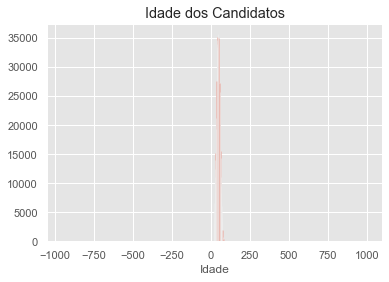

In [25]:
idade_publico = Counter(data_frame['NR_IDADE_DATA_POSSE'])
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_publico.keys(), idade_publico.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos')
plt.show()

<b>ANÁLISE DADOS</b>

<b> Agrupamento de dados selecionando dados de interesse: </b> Dados do candidato 

In [26]:
#removendo dados com todas linhas faltando dados
data_frame.dropna(how='all', inplace=True)
#descobrindo a idade média
mediaIdade = round(data_frame['NR_IDADE_DATA_POSSE'].mean(),0)
print(mediaIdade)
# Preenchendo a coluna com o valor da média:
data_frame.update(data_frame['NR_IDADE_DATA_POSSE'].fillna(mediaIdade))
# Dimensões do df_dados
data_frame.shape

45.0


(1112111, 63)

In [27]:
data_frame['NR_IDADE_DATA_POSSE'].describe().astype('int')

count    1112111
mean          45
std           11
min         -951
25%           37
50%           45
75%           53
max          999
Name: NR_IDADE_DATA_POSSE, dtype: int32

In [28]:
idade_max = data_frame[data_frame['NR_IDADE_DATA_POSSE'] > 104]
idade_min = data_frame[data_frame['NR_IDADE_DATA_POSSE'] < 18]

In [29]:
#Seleção das colunas de interesse
df_ida_max = idade_max[['SQ_CANDIDATO','ANO_ELEICAO','SG_UF','NR_CPF_CANDIDATO','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','CD_SITUACAO_CANDIDATO_URNA','ST_CANDIDATO_INSERIDO_URNA','VR_DESPESA_MAX_CAMPANHA']]
df_ida_max

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,NR_CPF_CANDIDATO,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
4575,1345297941,2016,AM,41737288249,12345,944.0,09/04/1072,NAILSON ALVES DE CAMPOS,2,SIM,10803.91
5876,1345301017,2016,AM,64157520220,45888,999.0,31/01/0976,MARIA IZABEL PINTO BARBOSA,2,SIM,10803.91
6537,1345303268,2016,AM,57808791253,45000,999.0,27/09/0072,LUCAS DOS SANTOS CORREA,2,SIM,10803.91
7555,1345301791,2016,AM,79590586287,40333,999.0,30/03/0970,ERISVALDO FERREIRA TAVARES,2,SIM,17445.96
72216,1151043192,2016,MG,78684242653,22456,999.0,21/08/0065,REINALDO DUARTE FERNANDES,-1,NÃO,10803.91
168817,-1798690850,2016,PE,99019272420,21021,999.0,28/09/0076,TATIANO PATRICIO DA COSTA CUNHA,2,SIM,121699.88
303451,-1928231893,2016,RR,78961890204,55111,999.0,01/04/0082,VANDERSON ANTONIO PORTO CAMPOS,2,SIM,343902.96
331410,-453390931,2016,RS,14008459049,15,967.0,27/05/1049,ALAOR PASTORIZA RIBEIRO,2,SIM,108039.06
372,-1733317123,2018,PA,01752740297,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,-1,NÃO,1000000
1215,-1538546057,2020,BA,62841106500,19123,999.0,30/01/0972,SIMONE MARIA DOS SANTOS FARIAS,2,SIM,12307.75


Fonte: Repositório de dados eleitorais ( https://www.tse.jus.br/hotsites/catalogo-publicacoes/pdf/relatorio_eleicoes/relatorio-eleicoes-2014.pdf ) Relatório das Eleições 2014
Parte III – Um Olhar Infográfico - 52 considerou idades com Inválidas e sem tratamentos

<b> Criação de DataSet com dados para tratamento de distorções: </b>

<b> Tratamento dos dados da Idade </b>

In [30]:
#Seleção das colunas de interesse
df_ida_min = idade_min[['SQ_CANDIDATO','ANO_ELEICAO','NR_CPF_CANDIDATO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','CD_SITUACAO_CANDIDATO_URNA','ST_CANDIDATO_INSERIDO_URNA','VR_DESPESA_MAX_CAMPANHA']]
df_ida_min

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
30275,-129533892,2016,57352305300,CE,51200,12.0,13/12/2004,FRANCISCO FABIO GUEDES UCHÔA,-1,NÃO,28485.94
40053,-259077883,2016,48902659100,MS,55222,-951.0,12/12/2968,JAIME CARDOSO DA CRUZ,2,SIM,643105.41
7292,1346185022,2020,06290001230,AM,27206,17.0,24/02/2003,FRANCINEIA OLIVEIRA DE SOUZA,-1,NÃO,15998.83
308153,-1797491124,2020,07050764400,PE,36111,16.0,03/03/2004,LUIZ ALMEIDA,-1,NÃO,134612.46
515295,-1732911331,2020,08905421202,PA,10700,17.0,30/06/2003,DEYSE ADRIELE DA SILVA SARMANHO,-1,NÃO,34729.59


In [31]:
print('--------------------------------------')
for index, row in df_ida_max.iterrows():
    data_frame.at[index , 'NR_IDADE_DATA_POSSE' ] = mediaIdade
    print('Id: ' + str(index))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('CPF: ' + str(row['NR_CPF_CANDIDATO']))    
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str(mediaIdade))
    print('--------------------------------------')

--------------------------------------
Id: 4575
Ano: 2016
Candidato: 1345297941
CPF: 41737288249
Nome: NAILSON ALVES DE CAMPOS
Data Nascimento: 09/04/1072
Idade Antiga: 944.0
Idade Aualizada: 45.0
--------------------------------------
Id: 5876
Ano: 2016
Candidato: 1345301017
CPF: 64157520220
Nome: MARIA IZABEL PINTO BARBOSA
Data Nascimento: 31/01/0976
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
Id: 6537
Ano: 2016
Candidato: 1345303268
CPF: 57808791253
Nome: LUCAS DOS SANTOS CORREA
Data Nascimento: 27/09/0072
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
Id: 7555
Ano: 2016
Candidato: 1345301791
CPF: 79590586287
Nome: ERISVALDO FERREIRA TAVARES
Data Nascimento: 30/03/0970
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
Id: 72216
Ano: 2016
Candidato: 1151043192
CPF: 78684242653
Nome: REINALDO DUARTE FERNANDES
Data Nascimento: 21/08/0065
Idade Antiga: 999.0
Idade Aualizada: 45.0
------

In [32]:
print('--------------------------------------')
for index, row in df_ida_min.iterrows():
    data_frame.at[index , 'NR_IDADE_DATA_POSSE' ] = 18
    print('Id: ' + str(index))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('CPF: ' + str(row['NR_CPF_CANDIDATO']))   
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Atualizada: ' + str('18'))
    print('--------------------------------------')

--------------------------------------
Id: 30275
Ano: 2016
Candidato: -129533892
CPF: 57352305300
Nome: FRANCISCO FABIO GUEDES UCHÔA
Data Nascimento: 13/12/2004
Idade Antiga: 12.0
Idade Atualizada: 18
--------------------------------------
Id: 40053
Ano: 2016
Candidato: -259077883
CPF: 48902659100
Nome: JAIME CARDOSO DA CRUZ
Data Nascimento: 12/12/2968
Idade Antiga: -951.0
Idade Atualizada: 18
--------------------------------------
Id: 7292
Ano: 2020
Candidato: 1346185022
CPF: 06290001230
Nome: FRANCINEIA OLIVEIRA DE SOUZA
Data Nascimento: 24/02/2003
Idade Antiga: 17.0
Idade Atualizada: 18
--------------------------------------
Id: 308153
Ano: 2020
Candidato: -1797491124
CPF: 07050764400
Nome: LUIZ ALMEIDA
Data Nascimento: 03/03/2004
Idade Antiga: 16.0
Idade Atualizada: 18
--------------------------------------
Id: 515295
Ano: 2020
Candidato: -1732911331
CPF: 08905421202
Nome: DEYSE ADRIELE DA SILVA SARMANHO
Data Nascimento: 30/06/2003
Idade Antiga: 17.0
Idade Atualizada: 18
----------

In [33]:
data_frame[data_frame['NR_IDADE_DATA_POSSE'] > 104]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA


In [34]:
data_frame[data_frame['NR_IDADE_DATA_POSSE'] < 18]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA


In [35]:
data_frame['NR_IDADE_DATA_POSSE'].describe().astype('int')

count    1112111
mean          45
std           11
min           18
25%           37
50%           45
75%           53
max          101
Name: NR_IDADE_DATA_POSSE, dtype: int32

<b> Agrupamento de dados selecionando dados de interesse: </b>Dados do Cassação 

In [36]:
#Seleção das colunas de interesse
df_consulta_candidato = data_frame[['SQ_CANDIDATO','ANO_ELEICAO','NR_CPF_CANDIDATO','NR_CANDIDATO', 'NM_CANDIDATO','CD_CARGO','DS_CARGO','NR_PARTIDO','SG_PARTIDO','SG_UF','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','CD_GENERO','DS_GENERO', 'DT_NASCIMENTO','DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA','ST_REELEICAO','TP_ABRANGENCIA','ST_DECLARAR_BENS','CD_GRAU_INSTRUCAO','DS_SITUACAO_CANDIDATURA','CD_SITUACAO_CANDIDATO_URNA','ST_CANDIDATO_INSERIDO_URNA','VR_DESPESA_MAX_CAMPANHA']]

In [37]:
#Seleção das colunas de interesse
df_consulta_cassacao = data_frame_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','DS_MOTIVO_CASSACAO']]
display(df_consulta_cassacao.head())
# Imprimindo as últimas linhas
display(df_consulta_cassacao.tail())
# Informações do nosso DataFrame
df_consulta_cassacao.describe()

,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
0,1345306401,2014,Ausência de requisito de registro
1,1345306408,2014,Ficha limpa (LC 64/90)
1,-582929209,2014,Ausência de requisito de registro
2,-582929208,2014,Ausência de requisito de registro
3,-582929203,2014,Ausência de requisito de registro


,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
18282,892688642,2020,Ausência de requisito de registro
18283,892688642,2020,Indeferimento de partido ou coligação.
18284,-1603178840,2020,Ausência de requisito de registro
18285,893050315,2020,Indeferimento de partido ou coligação.
18286,-1732749819,2020,Ausência de requisito de registro


,SQ_CANDIDATO,ANO_ELEICAO
count,4.006700e+04,40067.000000
mean,2.081268e+07,2017.955475
std,1.180319e+09,1.933816
min,-1.993005e+09,2014.000000
25%,-1.538368e+09,2016.000000
50%,8.919355e+08,2018.000000
75%,1.022687e+09,2020.000000
max,1.411339e+09,2020.000000


In [38]:
m_df_candidato_cassacao = pd.merge(df_consulta_candidato, df_consulta_cassacao, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [39]:
display(m_df_candidato_cassacao.head())
# Imprimindo as últimas linhas
display(m_df_candidato_cassacao.tail())
# Informações do nosso DataFrame
m_df_candidato_cassacao.describe()

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,DS_COR_RACA,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA,DS_MOTIVO_CASSACAO
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,PARDA,N,FEDERAL,S,7,APTO,2,SIM,500000,NaN
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,PARDA,N,FEDERAL,S,4,APTO,2,SIM,0,NaN
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,BRANCA,N,FEDERAL,S,2,APTO,2,SIM,800000,NaN
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,PARDA,N,FEDERAL,S,8,APTO,2,SIM,600000,NaN
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,BRANCA,N,FEDERAL,N,8,APTO,2,SIM,600000,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,DS_COR_RACA,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA,DS_MOTIVO_CASSACAO
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,VEREADOR,11,PP,MG,...,PARDA,N,MUNICIPAL,S,6,APTO,2,SIM,12307.75,NaN
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,VICE-PREFEITO,11,PP,MA,...,PRETA,N,MUNICIPAL,S,6,APTO,2,SIM,-1,NaN
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,VEREADOR,11,PP,PB,...,PARDA,N,MUNICIPAL,S,6,APTO,2,SIM,12307.75,NaN
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,VEREADOR,70,AVANTE,RJ,...,PARDA,N,MUNICIPAL,S,7,APTO,2,SIM,17128.76,NaN
1115071,893049149,2020,25139194830,70010,LAÉRCIO APARECIDO TAVARES,13,VEREADOR,70,AVANTE,SP,...,PRETA,N,MUNICIPAL,S,3,APTO,2,SIM,23017.41,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,CD_CARGO,NR_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_COR_RACA,CD_GRAU_INSTRUCAO
count,1.115072e+06,1.115072e+06,1.115072e+06,1.115072e+06,1.115072e+06,1.115072e+06,1.115072e+06,1.115072e+06,1.115072e+06
mean,3.653927e+07,2.018014e+03,2.885905e+04,1.258490e+01,3.108674e+01,4.530983e+01,2.650878e+00,1.932391e+00,5.701571e+00
std,1.143557e+09,2.043640e+00,2.132581e+04,1.414666e+00,2.033692e+01,1.158826e+01,9.450598e-01,1.018655e+00,1.784695e+00
min,-1.993005e+09,2.014000e+03,1.000000e+01,1.000000e+00,1.000000e+01,1.800000e+01,-4.000000e+00,-4.000000e+00,-4.000000e+00
25%,-5.829338e+08,2.016000e+03,1.322200e+04,1.300000e+01,1.400000e+01,3.700000e+01,2.000000e+00,1.000000e+00,4.000000e+00
50%,8.919059e+08,2.020000e+03,2.212400e+04,1.300000e+01,2.300000e+01,4.500000e+01,2.000000e+00,2.000000e+00,6.000000e+00
75%,1.086245e+09,2.020000e+03,4.400000e+04,1.300000e+01,4.500000e+01,5.300000e+01,4.000000e+00,3.000000e+00,7.000000e+00
max,1.411349e+09,2.020000e+03,9.099900e+04,1.300000e+01,9.000000e+01,1.010000e+02,4.000000e+00,6.000000e+00,8.000000e+00


In [40]:
m_df_candidato_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,DS_COR_RACA,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA,DS_MOTIVO_CASSACAO
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,PARDA,N,FEDERAL,S,7,APTO,2,SIM,500000,NaN
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,PARDA,N,FEDERAL,S,4,APTO,2,SIM,0,NaN
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,BRANCA,N,FEDERAL,S,2,APTO,2,SIM,800000,NaN
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,PARDA,N,FEDERAL,S,8,APTO,2,SIM,600000,NaN
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,BRANCA,N,FEDERAL,N,8,APTO,2,SIM,600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,VEREADOR,11,PP,MG,...,PARDA,N,MUNICIPAL,S,6,APTO,2,SIM,12307.75,NaN
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,VICE-PREFEITO,11,PP,MA,...,PRETA,N,MUNICIPAL,S,6,APTO,2,SIM,-1,NaN
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,VEREADOR,11,PP,PB,...,PARDA,N,MUNICIPAL,S,6,APTO,2,SIM,12307.75,NaN
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,VEREADOR,70,AVANTE,RJ,...,PARDA,N,MUNICIPAL,S,7,APTO,2,SIM,17128.76,NaN


In [41]:
#Calcula o total e a % de valores ausentes
num_ausentes = m_df_candidato_cassacao.isna().sum()
porc_ausentes = m_df_candidato_cassacao.isna().sum() * 100 / len(m_df_candidato_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': m_df_candidato_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
SQ_CANDIDATO,SQ_CANDIDATO,0,0.000000
ANO_ELEICAO,ANO_ELEICAO,0,0.000000
NR_CPF_CANDIDATO,NR_CPF_CANDIDATO,0,0.000000
NR_CANDIDATO,NR_CANDIDATO,0,0.000000
NM_CANDIDATO,NM_CANDIDATO,0,0.000000
CD_CARGO,CD_CARGO,0,0.000000
DS_CARGO,DS_CARGO,0,0.000000
NR_PARTIDO,NR_PARTIDO,0,0.000000
SG_PARTIDO,SG_PARTIDO,0,0.000000
SG_UF,SG_UF,0,0.000000


<b> Selecionando alguns dados para análise </b>

In [42]:
#Seleção das colunas de interesse
df_candidato_cassacao = m_df_candidato_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','NR_CPF_CANDIDATO','NR_CANDIDATO', 'NM_CANDIDATO','CD_CARGO','DS_CARGO','NR_PARTIDO','SG_PARTIDO','SG_UF','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','CD_GENERO','DS_GENERO','DS_MOTIVO_CASSACAO','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA','ST_REELEICAO', 'TP_ABRANGENCIA','ST_DECLARAR_BENS','DS_GRAU_INSTRUCAO','CD_GRAU_INSTRUCAO','DS_SITUACAO_CANDIDATURA','DT_NASCIMENTO','CD_SITUACAO_CANDIDATO_URNA','ST_CANDIDATO_INSERIDO_URNA','VR_DESPESA_MAX_CAMPANHA']]

In [43]:
df_candidato_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,N,FEDERAL,S,SUPERIOR INCOMPLETO,7,APTO,16/09/1972,2,SIM,500000
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,N,FEDERAL,S,ENSINO FUNDAMENTAL COMPLETO,4,APTO,06/04/1971,2,SIM,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,N,FEDERAL,S,LÊ E ESCREVE,2,APTO,16/09/1968,2,SIM,800000
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,S,SUPERIOR COMPLETO,8,APTO,01/10/1985,2,SIM,600000
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,N,SUPERIOR COMPLETO,8,APTO,19/04/1977,2,SIM,600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,VEREADOR,11,PP,MG,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,08/07/1998,2,SIM,12307.75
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,VICE-PREFEITO,11,PP,MA,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,04/07/1949,2,SIM,-1
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,VEREADOR,11,PP,PB,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,09/06/1982,2,SIM,12307.75
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,VEREADOR,70,AVANTE,RJ,...,N,MUNICIPAL,S,SUPERIOR INCOMPLETO,7,APTO,04/10/1992,2,SIM,17128.76


In [44]:
df_candidato_cassacao.groupby('DS_CARGO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_CARGO
VEREADOR              984048
VICE-PREFEITO          37956
PREFEITO               37229
DEPUTADO ESTADUAL      35154
DEPUTADO FEDERAL       15855
DEPUTADO DISTRITAL      2037
2º SUPLENTE              626
1º SUPLENTE              613
SENADOR                  562
VICE-GOVERNADOR          474
GOVERNADOR               461
PRESIDENTE                29
VICE-PRESIDENTE           28
Name: NR_CPF_CANDIDATO, dtype: int64

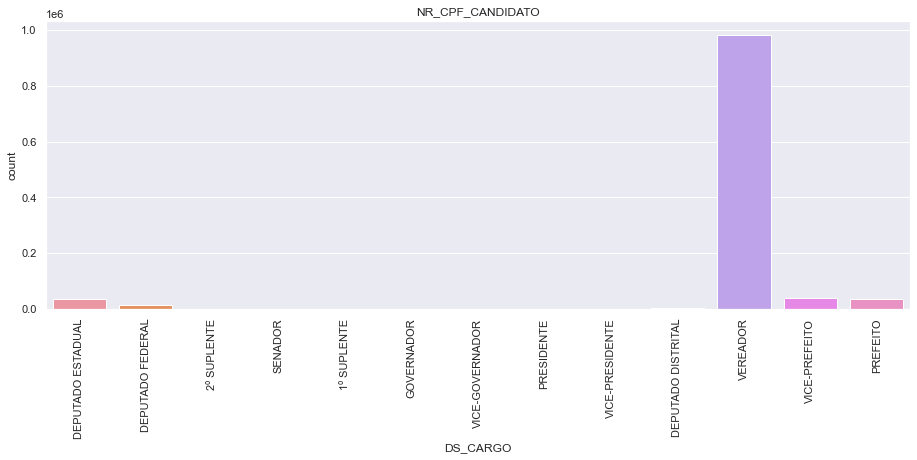

In [45]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
genderCount  = sns.countplot(x="DS_CARGO", data=df_candidato_cassacao).set_title("NR_CPF_CANDIDATO")

In [46]:
cols_dados = ["ANO_ELEICAO", "NR_PARTIDO","SG_PARTIDO","SG_UF","ST_REELEICAO","DS_SIT_TOT_TURNO","DS_MOTIVO_CASSACAO"]
df_candidato_cassacao[cols_dados]

,ANO_ELEICAO,NR_PARTIDO,SG_PARTIDO,SG_UF,ST_REELEICAO,DS_SIT_TOT_TURNO,DS_MOTIVO_CASSACAO
0,2014,54,PPL,AC,N,SUPLENTE,NaN
1,2014,40,PSB,AC,N,SUPLENTE,NaN
2,2014,11,PP,AC,N,SUPLENTE,NaN
3,2014,43,PV,AC,N,SUPLENTE,NaN
4,2014,43,PV,AC,N,SUPLENTE,NaN
...,...,...,...,...,...,...,...
1115067,2020,11,PP,MG,N,SUPLENTE,NaN
1115068,2020,11,PP,MA,N,NÃO ELEITO,NaN
1115069,2020,11,PP,PB,N,ELEITO POR QP,NaN
1115070,2020,70,AVANTE,RJ,N,SUPLENTE,NaN


In [47]:
df_candidato_cassacao.groupby('DS_SIT_TOT_TURNO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_SIT_TOT_TURNO
SUPLENTE            662109
NÃO ELEITO          267191
ELEITO POR QP        88316
#NULO#               43232
ELEITO POR MÉDIA     30789
ELEITO               22855
2º TURNO               580
Name: NR_CPF_CANDIDATO, dtype: int64

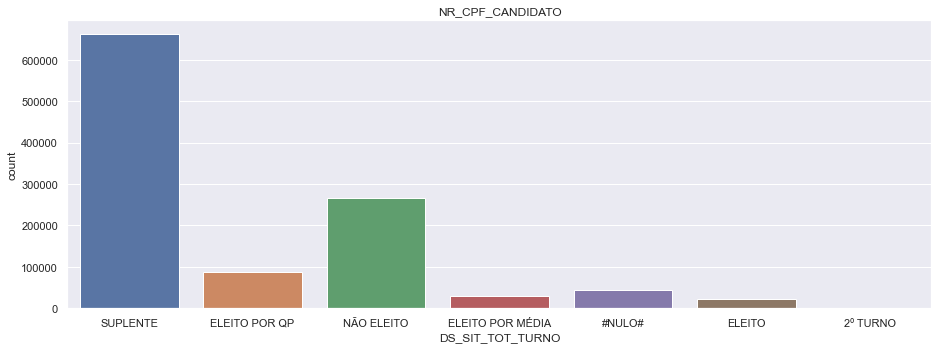

In [48]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
genderCount  = sns.countplot(x="DS_SIT_TOT_TURNO", data=df_candidato_cassacao).set_title("NR_CPF_CANDIDATO")

In [49]:
df_candidato_cassacao.groupby('DS_MOTIVO_CASSACAO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_MOTIVO_CASSACAO
Ausência de requisito de registro            30011
Ficha limpa (LC 64/90)                        4641
Indeferimento de partido ou coligação.        4063
Abuso de poder (LC 64/90)                      389
Impugnação                                     356
Partido Invalidado                             282
Conduta vedada (Lei 9.504/97).                 122
Compra de voto (Lei 9.504/97).                 109
Gasto ilícito de recursos (Lei 9.504/97).       88
Name: NR_CPF_CANDIDATO, dtype: int64

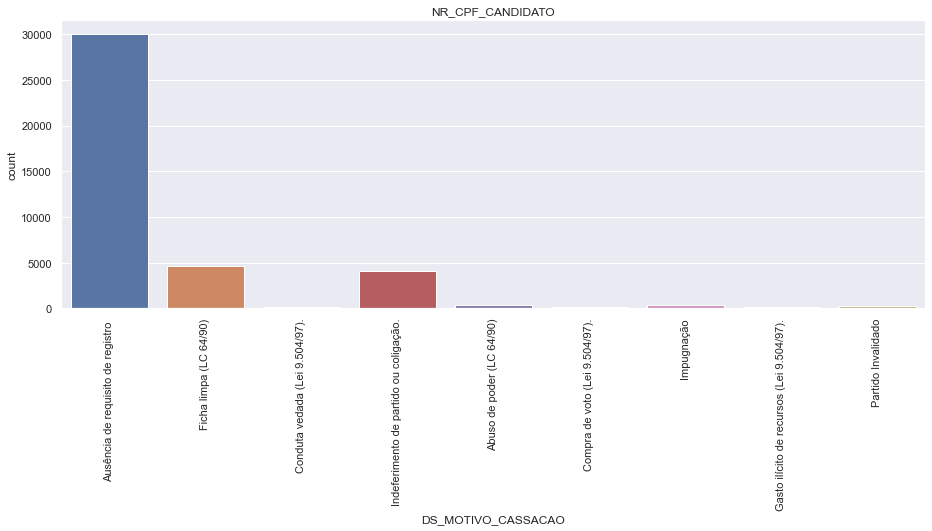

In [50]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
genderCount  = sns.countplot(x="DS_MOTIVO_CASSACAO", data=df_candidato_cassacao).set_title("NR_CPF_CANDIDATO")

Text(-23.500000000000007, 0.5, 'características do núcleo da célula')

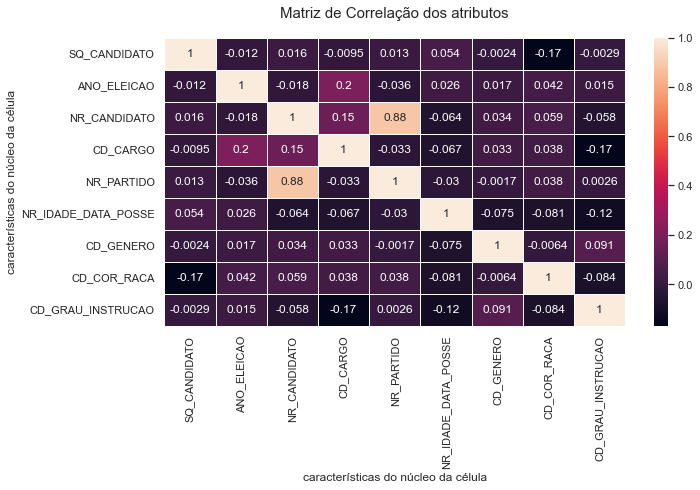

In [51]:
# Gráfico de Matriz de Correlação 
df_small = df_candidato_cassacao.copy()
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_small.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

In [52]:
df_candidato_cassacao['DS_MOTIVO_CASSACAO'].unique()

array([nan, 'Ausência de requisito de registro ',
       'Ficha limpa (LC 64/90)', 'Conduta vedada (Lei 9.504/97).',
       'Indeferimento de partido ou coligação.',
       'Abuso de poder (LC 64/90)', 'Compra de voto (Lei 9.504/97).',
       'Impugnação', 'Gasto ilícito de recursos (Lei 9.504/97).',
       'Partido Invalidado'], dtype=object)

Para iniciar a exploração dos dados será apresentado um sumário estatístico 
das variáveis com dados numéricos

In [53]:
df_candidato_cassacao.groupby('DS_MOTIVO_CASSACAO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_MOTIVO_CASSACAO
Ausência de requisito de registro            30011
Ficha limpa (LC 64/90)                        4641
Indeferimento de partido ou coligação.        4063
Abuso de poder (LC 64/90)                      389
Impugnação                                     356
Partido Invalidado                             282
Conduta vedada (Lei 9.504/97).                 122
Compra de voto (Lei 9.504/97).                 109
Gasto ilícito de recursos (Lei 9.504/97).       88
Name: NR_CPF_CANDIDATO, dtype: int64

In [54]:
data_frame.groupby('DS_SIT_TOT_TURNO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_SIT_TOT_TURNO
SUPLENTE            662104
NÃO ELEITO          265612
ELEITO POR QP        88314
#NULO#               41866
ELEITO POR MÉDIA     30789
ELEITO               22846
2º TURNO               580
Name: NR_CPF_CANDIDATO, dtype: int64

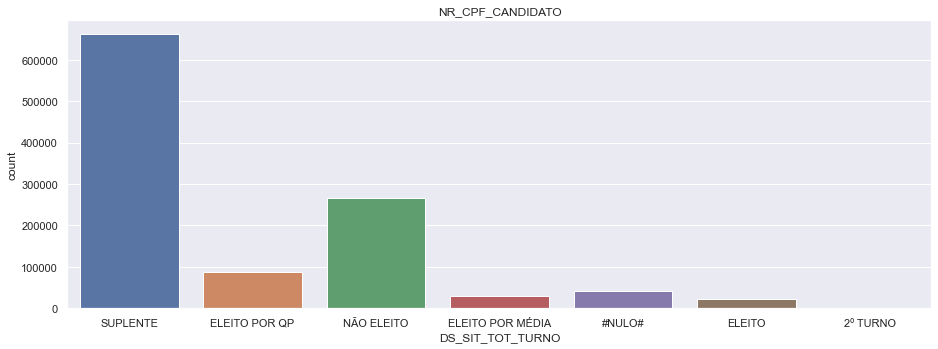

In [55]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
genderCount  = sns.countplot(x="DS_SIT_TOT_TURNO", data=data_frame).set_title("NR_CPF_CANDIDATO")

In [56]:
df_candidato_cassacao.shape

(1115072, 28)

In [57]:
df_candidato_cassacao.groupby('DS_SITUACAO_CANDIDATURA')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_SITUACAO_CANDIDATURA
APTO          1050948
INAPTO          64110
CADASTRADO         14
Name: NR_CPF_CANDIDATO, dtype: int64

In [58]:
data_frame.groupby('ST_CANDIDATO_INSERIDO_URNA')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

ST_CANDIDATO_INSERIDO_URNA
SIM    1072422
NÃO      39689
Name: NR_CPF_CANDIDATO, dtype: int64

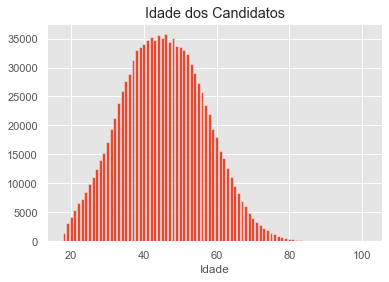

In [59]:
idade_publico = Counter(df_candidato_cassacao['NR_IDADE_DATA_POSSE'])
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_publico.keys(), idade_publico.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos')
plt.show()

In [60]:
idade_cal = Counter(df_candidato_cassacao['NR_PARTIDO'])

In [61]:
totalValor = np.array(df_candidato_cassacao['ANO_ELEICAO'])

In [62]:
df_candidato_cassacao.head()

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,N,FEDERAL,S,SUPERIOR INCOMPLETO,7,APTO,16/09/1972,2,SIM,500000
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,N,FEDERAL,S,ENSINO FUNDAMENTAL COMPLETO,4,APTO,06/04/1971,2,SIM,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,N,FEDERAL,S,LÊ E ESCREVE,2,APTO,16/09/1968,2,SIM,800000
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,S,SUPERIOR COMPLETO,8,APTO,01/10/1985,2,SIM,600000
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,N,SUPERIOR COMPLETO,8,APTO,19/04/1977,2,SIM,600000


In [63]:
#Criação de um dataframe final com candidatos eleitos
df_eleitos = df_candidato_cassacao[~df_candidato_cassacao.DS_SIT_TOT_TURNO.isin(['#NULO#','2º TURNO', 'NÃO ELEITO'])]

In [64]:
df_eleitos

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,N,FEDERAL,S,SUPERIOR INCOMPLETO,7,APTO,16/09/1972,2,SIM,500000
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,N,FEDERAL,S,ENSINO FUNDAMENTAL COMPLETO,4,APTO,06/04/1971,2,SIM,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,N,FEDERAL,S,LÊ E ESCREVE,2,APTO,16/09/1968,2,SIM,800000
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,S,SUPERIOR COMPLETO,8,APTO,01/10/1985,2,SIM,600000
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,N,SUPERIOR COMPLETO,8,APTO,19/04/1977,2,SIM,600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115066,892584099,2020,42747958884,10555,ELEQUIELE APARECIDA MATEUS DA CRUZ,13,VEREADOR,10,REPUBLICANOS,SP,...,N,MUNICIPAL,S,SUPERIOR COMPLETO,8,APTO,01/08/1993,2,SIM,12307.75
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,VEREADOR,11,PP,MG,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,08/07/1998,2,SIM,12307.75
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,VEREADOR,11,PP,PB,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,09/06/1982,2,SIM,12307.75
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,VEREADOR,70,AVANTE,RJ,...,N,MUNICIPAL,S,SUPERIOR INCOMPLETO,7,APTO,04/10/1992,2,SIM,17128.76


In [65]:
df_eleitos_cassados = df_eleitos[~df_eleitos.DS_MOTIVO_CASSACAO.isnull()]

In [66]:
df_eleitos_cassados

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
42114,1345304173,2016,51707152268,19000,ALDIONE SOUZA CORDOVIL,13,VEREADOR,19,PTN,AM,...,N,MUNICIPAL,S,SUPERIOR COMPLETO,8,INAPTO,30/04/1979,2,SIM,68577.27
43356,1345303187,2016,14742284291,15,RAIMUNDO PINHEIRO DA SILVA,11,PREFEITO,15,PMDB,AM,...,N,MUNICIPAL,S,SUPERIOR INCOMPLETO,7,APTO,31/08/1963,16,SIM,613178.16
43459,1345303188,2016,02705230220,15,ANTÔNIO ARAÚJO COELHO,12,VICE-PREFEITO,77,SD,AM,...,N,MUNICIPAL,S,SUPERIOR COMPLETO,8,APTO,24/04/1951,16,SIM,-1
44630,1345300927,2016,16334060325,90789,JAMY DE CARVALHO CAMPOS,13,VEREADOR,90,PROS,AM,...,N,MUNICIPAL,S,SUPERIOR COMPLETO,8,INAPTO,13/05/1958,17,SIM,24651.47
45791,-64768849,2016,46280847691,15007,MARIO RICARDO NASCIMENTO DE OLIVEIRA,13,VEREADOR,15,PMDB,AP,...,N,MUNICIPAL,N,SUPERIOR COMPLETO,8,INAPTO,09/04/1962,16,SIM,59644.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966054,-128760215,2020,07763935707,15678,FRANCISCO GILMAR GONCALVES,13,VEREADOR,15,MDB,CE,...,N,MUNICIPAL,S,SUPERIOR COMPLETO,8,INAPTO,02/11/1973,2,SIM,20550.58
984581,892794855,2020,92557910872,12345,CONSTANCIA BERBERT DUTRA DA SILVA,13,VEREADOR,12,PDT,SP,...,N,MUNICIPAL,S,SUPERIOR COMPLETO,8,APTO,11/03/1957,2,SIM,125483.67
1052598,893019484,2020,06696211888,40310,ANTONIO CASSEMIRO DA SILVA,13,VEREADOR,40,PSB,SP,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,INAPTO,19/06/1967,16,SIM,69762.86
1074223,-322800397,2020,07520626466,11234,ANTONIO DUARTE DA SILVA,13,VEREADOR,11,PP,PB,...,N,MUNICIPAL,N,ENSINO MÉDIO COMPLETO,6,INAPTO,21/06/1987,16,SIM,12307.75


In [67]:
#Criação de um dataframe final com candidatos eleitos
df_nao_eleitos = df_candidato_cassacao[df_candidato_cassacao.DS_SIT_TOT_TURNO.isin(['#NULO#','2º TURNO', 'NÃO ELEITO'])]

In [68]:
df_nao_eleitos

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
18,1410065775,2014,45689709115,2515,MARIA TERESA GAUNA,6,DEPUTADO FEDERAL,25,DEM,AC,...,N,FEDERAL,S,SUPERIOR COMPLETO,8,APTO,30/11/1954,2,SIM,800000
19,1410065778,2014,13813013200,2577,SAULO DE FREITAS RIBEIRO,6,DEPUTADO FEDERAL,25,DEM,AC,...,N,FEDERAL,S,SUPERIOR COMPLETO,8,APTO,20/09/1960,2,SIM,800000
25,1410065762,2014,43480063268,333,SANDRA MARIA DA SILVA ROCHA DE AVILA SALDO,10,2º SUPLENTE,43,PV,AC,...,N,FEDERAL,N,SUPERIOR COMPLETO,8,APTO,21/06/1973,2,SIM,-1
32,1410065735,2014,65234782204,4321,FRANCISCO ANTONIO LIRA DA SILVA MONTEIRO,6,DEPUTADO FEDERAL,43,PV,AC,...,N,FEDERAL,N,ENSINO MÉDIO INCOMPLETO,5,APTO,28/02/1981,2,SIM,800000
51,1410065658,2014,16191463200,54555,CARLOS ROBERTO DE OLIVEIRA,7,DEPUTADO ESTADUAL,54,PPL,AC,...,N,FEDERAL,S,ENSINO MÉDIO COMPLETO,6,INAPTO,28/11/1961,-1,NÃO,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115058,892565695,2020,04347732805,13222,EVANI FERREIRA DA SILVA,13,VEREADOR,13,PT,SP,...,N,MUNICIPAL,S,ENSINO FUNDAMENTAL INCOMPLETO,3,APTO,24/06/1959,2,SIM,71701.72
1115060,-452722536,2020,56550871034,40,JACSON MELLO DA SILVA,12,VICE-PREFEITO,14,PTB,RS,...,N,MUNICIPAL,S,SUPERIOR INCOMPLETO,7,APTO,29/05/1969,2,SIM,-1
1115062,-517506006,2020,61481092987,10999,CLEUSA DE JESUS MONTEIRO,13,VEREADOR,10,REPUBLICANOS,SC,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,26/01/1966,2,SIM,12307.75
1115063,893057713,2020,03958791670,11200,EGIDIO SERGIO DE OLIVEIRA,13,VEREADOR,11,PP,SP,...,N,MUNICIPAL,S,ENSINO FUNDAMENTAL COMPLETO,4,APTO,09/03/1979,2,SIM,12307.75


In [69]:
df_nao_eleitos_cassados = df_nao_eleitos[~df_nao_eleitos.DS_MOTIVO_CASSACAO.isnull()]

In [70]:
df_nao_eleitos_cassados

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
1163,1345306401,2014,71172092249,23,LILIANE ARAUJO DE ALMEIDA,3,GOVERNADOR,23,PPS,AM,...,N,ESTADUAL,S,SUPERIOR COMPLETO,8,APTO,15/06/1982,4,SIM,16217863.59
1498,1345306408,2014,33460825200,11,ABDALA HABIB FRAXE JUNIOR,4,VICE-GOVERNADOR,19,PODE,AM,...,N,ESTADUAL,S,SUPERIOR COMPLETO,8,INAPTO,19/09/1969,17,SIM,-1
8854,-582929203,2014,32303165172,50,MELQUESEDEC MAGALHAES AIRES,4,VICE-GOVERNADOR,50,PSOL,TO,...,N,ESTADUAL,S,SUPERIOR COMPLETO,8,APTO,30/11/1963,4,SIM,-1
12396,-582929209,2014,47207868120,50,MARIO LUCIO DE AVELAR,3,GOVERNADOR,50,PSOL,TO,...,N,ESTADUAL,S,SUPERIOR COMPLETO,8,APTO,23/11/1965,4,SIM,0
15527,-582929208,2014,88718298168,50,MAYST MARCOS DE SOUSA SANTOS,4,VICE-GOVERNADOR,50,PSOL,TO,...,N,ESTADUAL,S,SUPERIOR COMPLETO,8,INAPTO,11/05/1979,-1,NÃO,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114436,-1732684650,2020,94050066220,65456,SEBASTIÃO AFONSO TRINDADE,13,VEREADOR,65,PC do B,PA,...,N,MUNICIPAL,S,ENSINO FUNDAMENTAL COMPLETO,4,INAPTO,25/04/1963,-1,NÃO,22325.78
1114437,1152033842,2020,08660845684,12125,JULIANA MORAIS SANTOS,13,VEREADOR,12,PDT,MG,...,N,MUNICIPAL,S,ENSINO FUNDAMENTAL COMPLETO,4,INAPTO,05/11/1986,-1,NÃO,38218.42
1114438,-582181190,2020,90164911120,28579,GUTEMBERG MAIA DE BESSA,13,VEREADOR,28,PRTB,TO,...,N,MUNICIPAL,N,ENSINO MÉDIO COMPLETO,6,INAPTO,12/10/1979,-1,NÃO,274057.1
1114439,-1732684008,2020,05407742276,36222,AGATHA VANESSA RODIGUES PINTO,13,VEREADOR,36,PTC,PA,...,N,MUNICIPAL,N,ENSINO MÉDIO INCOMPLETO,5,INAPTO,30/09/1998,-1,NÃO,17706.56


In [71]:
cassados = df_eleitos.loc[df_eleitos['DS_MOTIVO_CASSACAO'].notnull()]
#Contagem das opções da coluna DS_GENERO
genero_candidatos_cassados = Counter(cassados['DS_GENERO'])
genero_candidatos_cassados

Counter({'MASCULINO': 83, 'FEMININO': 16})

In [72]:
cassados_nao_eleito = df_nao_eleitos_cassados.loc[df_nao_eleitos_cassados['DS_MOTIVO_CASSACAO'].notnull()]
#Contagem das opções da coluna DS_GENERO
genero_candidatos_cassados_nao_eleito = Counter(cassados_nao_eleito['DS_GENERO'])
genero_candidatos_cassados_nao_eleito

Counter({'FEMININO': 14359, 'MASCULINO': 25603})

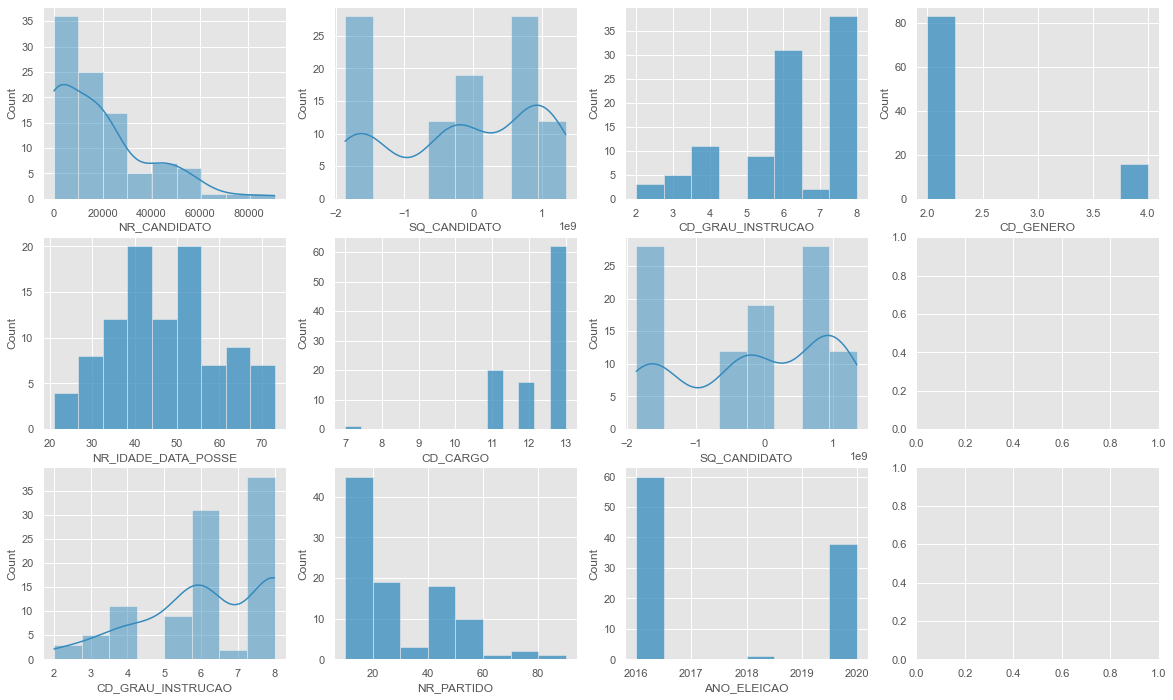

In [73]:
# Distributions of the features
fig, ax = plt.subplots(3, 4, figsize=(20, 12))
sns.histplot(df_eleitos_cassados['NR_CANDIDATO'],kde=True, ax=ax[0, 0])
sns.histplot(df_eleitos_cassados['SQ_CANDIDATO'], kde=True, ax=ax[0,1])
sns.histplot(df_eleitos_cassados['CD_GRAU_INSTRUCAO'], ax=ax[0, 2])
sns.histplot(df_eleitos_cassados['CD_GENERO'], ax=ax[0, 3])
sns.histplot(df_eleitos_cassados['NR_IDADE_DATA_POSSE'], ax=ax[1, 0])
sns.histplot(df_eleitos_cassados['CD_CARGO'], ax=ax[1, 1])
sns.histplot(df_eleitos_cassados['SQ_CANDIDATO'], kde=True, ax=ax[1, 2])
sns.histplot(df_eleitos_cassados['CD_GRAU_INSTRUCAO'], kde=True, ax=ax[2, 0])
sns.histplot(df_eleitos_cassados['NR_PARTIDO'], ax=ax[2, 1])
sns.histplot(df_eleitos_cassados['ANO_ELEICAO'], ax=ax[2, 2])
plt.show()

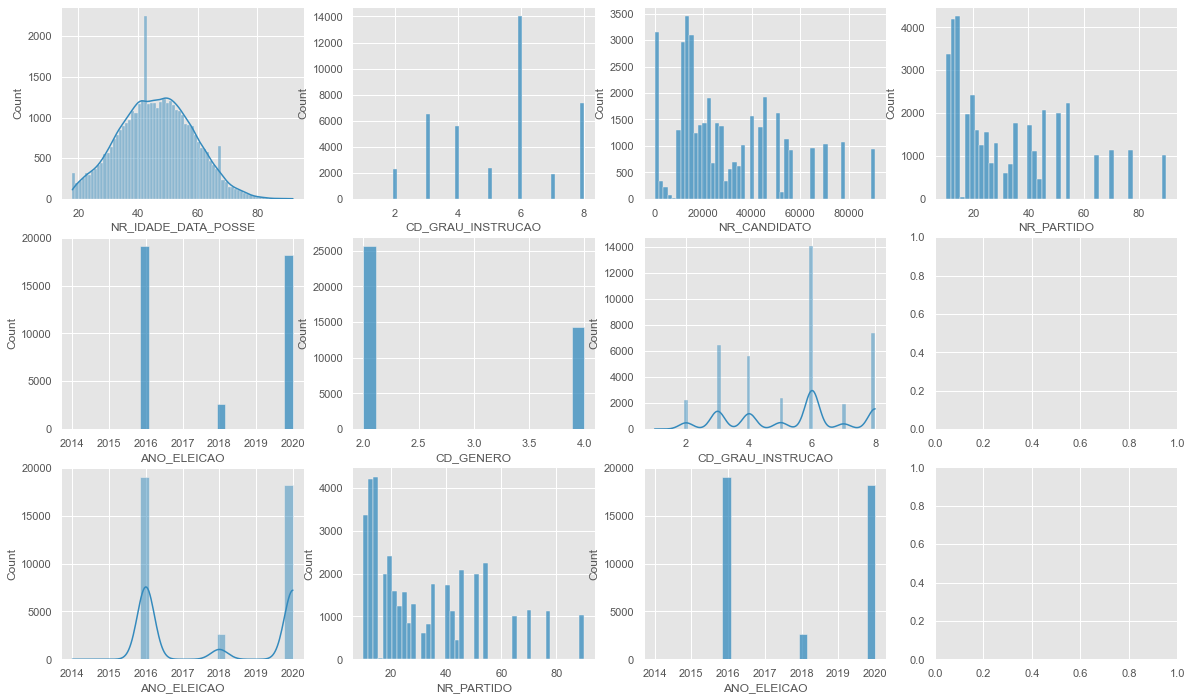

In [74]:
# Distributions of the features
fig, ax = plt.subplots(3, 4, figsize=(20, 12))
sns.histplot(df_nao_eleitos_cassados['NR_IDADE_DATA_POSSE'], kde=True, ax=ax[0, 0])
sns.histplot(df_nao_eleitos_cassados['CD_GRAU_INSTRUCAO'], ax=ax[0, 1])
sns.histplot(df_nao_eleitos_cassados['NR_CANDIDATO'], ax=ax[0, 2])
sns.histplot(df_nao_eleitos_cassados['NR_PARTIDO'], ax=ax[0, 3])
sns.histplot(df_nao_eleitos_cassados['ANO_ELEICAO'], ax=ax[1, 0])
sns.histplot(df_nao_eleitos_cassados['CD_GENERO'], ax=ax[1, 1])
sns.histplot(df_nao_eleitos_cassados['CD_GRAU_INSTRUCAO'], kde=True, ax=ax[1, 2])
sns.histplot(df_nao_eleitos_cassados['ANO_ELEICAO'], kde=True, ax=ax[2, 0])
sns.histplot(df_nao_eleitos_cassados['NR_PARTIDO'], ax=ax[2, 1])
sns.histplot(df_nao_eleitos_cassados['ANO_ELEICAO'], ax=ax[2, 2])
plt.show()

In [75]:
df_eleitos_cassados.groupby('DS_MOTIVO_CASSACAO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_MOTIVO_CASSACAO
Ausência de requisito de registro            27
Abuso de poder (LC 64/90)                    21
Ficha limpa (LC 64/90)                       20
Compra de voto (Lei 9.504/97).               11
Partido Invalidado                           11
Conduta vedada (Lei 9.504/97).                6
Gasto ilícito de recursos (Lei 9.504/97).     2
Indeferimento de partido ou coligação.        1
Name: NR_CPF_CANDIDATO, dtype: int64

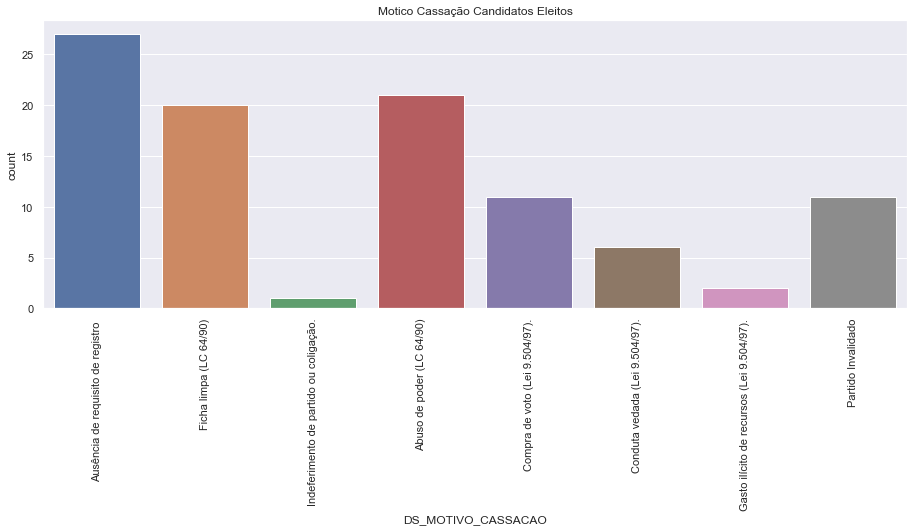

In [76]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
genderCount  = sns.countplot(x="DS_MOTIVO_CASSACAO", data=df_eleitos_cassados).set_title("Motico Cassação Candidatos Eleitos")

In [77]:
df_nao_eleitos_cassados.groupby('DS_MOTIVO_CASSACAO')['NR_CPF_CANDIDATO'].count().sort_values(ascending=False)

DS_MOTIVO_CASSACAO
Ausência de requisito de registro            29984
Ficha limpa (LC 64/90)                        4621
Indeferimento de partido ou coligação.        4062
Abuso de poder (LC 64/90)                      368
Impugnação                                     356
Partido Invalidado                             271
Conduta vedada (Lei 9.504/97).                 116
Compra de voto (Lei 9.504/97).                  98
Gasto ilícito de recursos (Lei 9.504/97).       86
Name: NR_CPF_CANDIDATO, dtype: int64

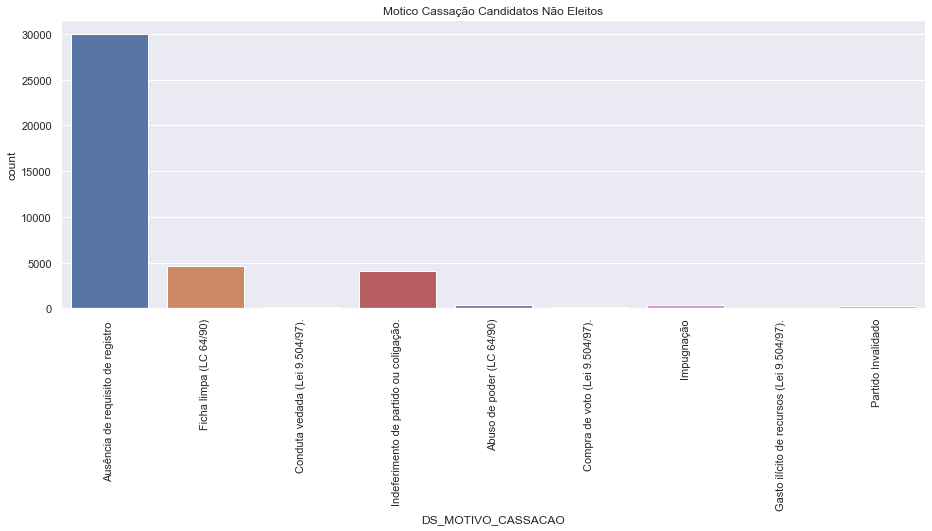

In [78]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
genderCount  = sns.countplot(x="DS_MOTIVO_CASSACAO", data=df_nao_eleitos_cassados).set_title("Motico Cassação Candidatos Não Eleitos")

In [79]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos_eleitos = Counter(df_eleitos['DS_GENERO'])
genero_candidatos_eleitos

Counter({'MASCULINO': 541769, 'FEMININO': 262269, 'NÃO DIVULGÁVEL': 31})

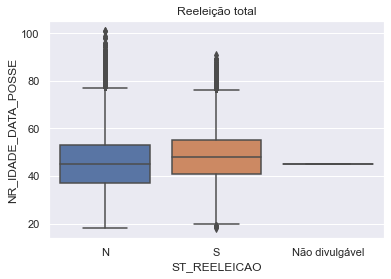

In [80]:
sns.boxplot(x='ST_REELEICAO', y='NR_IDADE_DATA_POSSE', data=df_eleitos)
plt.title('Reeleição total')
plt.show()

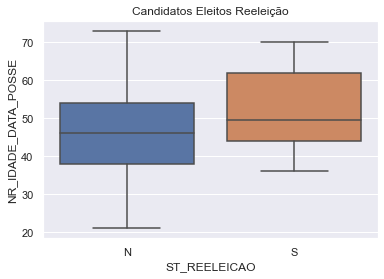

In [81]:
sns.boxplot(x='ST_REELEICAO', y='NR_IDADE_DATA_POSSE', data=df_eleitos_cassados)
plt.title('Candidatos Eleitos Reeleição')
plt.show()

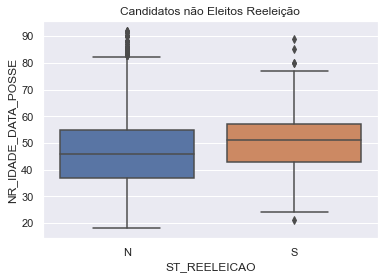

In [82]:
sns.boxplot(x='ST_REELEICAO', y='NR_IDADE_DATA_POSSE', data=df_nao_eleitos_cassados)
plt.title('Candidatos não Eleitos Reeleição')
plt.show()

In [83]:
df_candidato = df_candidato_cassacao.copy()

In [84]:
df_candidato

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,ST_REELEICAO,TP_ABRANGENCIA,ST_DECLARAR_BENS,DS_GRAU_INSTRUCAO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,CD_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_DESPESA_MAX_CAMPANHA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,N,FEDERAL,S,SUPERIOR INCOMPLETO,7,APTO,16/09/1972,2,SIM,500000
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,N,FEDERAL,S,ENSINO FUNDAMENTAL COMPLETO,4,APTO,06/04/1971,2,SIM,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,N,FEDERAL,S,LÊ E ESCREVE,2,APTO,16/09/1968,2,SIM,800000
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,S,SUPERIOR COMPLETO,8,APTO,01/10/1985,2,SIM,600000
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,N,FEDERAL,N,SUPERIOR COMPLETO,8,APTO,19/04/1977,2,SIM,600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,VEREADOR,11,PP,MG,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,08/07/1998,2,SIM,12307.75
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,VICE-PREFEITO,11,PP,MA,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,04/07/1949,2,SIM,-1
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,VEREADOR,11,PP,PB,...,N,MUNICIPAL,S,ENSINO MÉDIO COMPLETO,6,APTO,09/06/1982,2,SIM,12307.75
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,VEREADOR,70,AVANTE,RJ,...,N,MUNICIPAL,S,SUPERIOR INCOMPLETO,7,APTO,04/10/1992,2,SIM,17128.76


In [85]:
categorical_columns = [cname for cname in df_candidato.columns if df_candidato[cname].dtype == "object"]

In [86]:
categorical_columns

['DS_MOTIVO_CASSACAO', 'DS_COR_RACA']

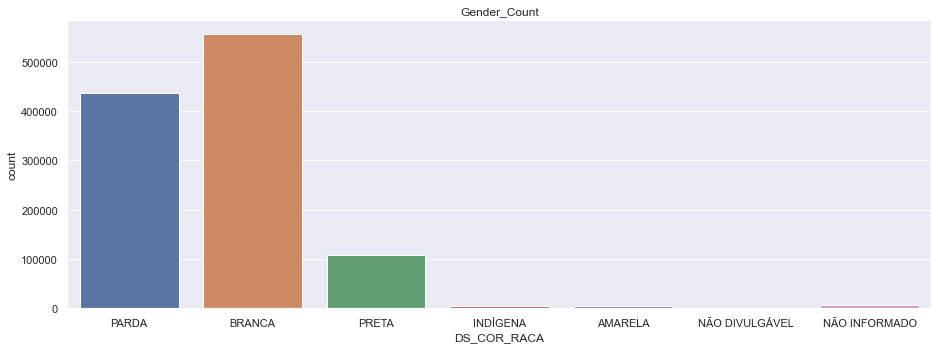

In [87]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
genderCount  = sns.countplot(x="DS_COR_RACA", data=df_candidato).set_title("Gender_Count")

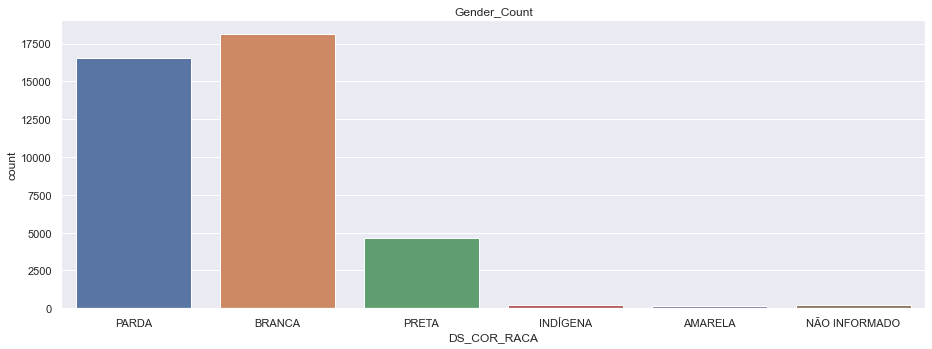

In [88]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
genderCount  = sns.countplot(x="DS_COR_RACA", data=df_nao_eleitos_cassados).set_title("Gender_Count")

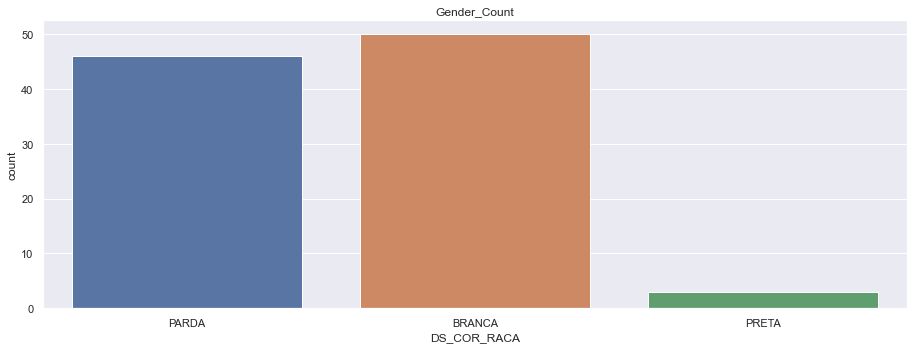

In [89]:
sns.set(style="darkgrid")       #style the plot background to become a grid
fig = plt.figure(figsize=(12,4))
eixo = fig.add_axes([0, 0, 1, 1])
genderCount  = sns.countplot(x="DS_COR_RACA", data=df_eleitos_cassados).set_title("Gender_Count")

In [90]:
df_candidato.isnull().sum()

SQ_CANDIDATO                        0
ANO_ELEICAO                         0
NR_CPF_CANDIDATO                    0
NR_CANDIDATO                        0
NM_CANDIDATO                        0
CD_CARGO                            0
DS_CARGO                            0
NR_PARTIDO                          0
SG_PARTIDO                          0
SG_UF                               0
DS_SIT_TOT_TURNO                    0
NR_IDADE_DATA_POSSE                 0
CD_GENERO                           0
DS_GENERO                           0
DS_MOTIVO_CASSACAO            1075011
DS_ESTADO_CIVIL                     0
CD_COR_RACA                         0
DS_COR_RACA                         0
ST_REELEICAO                        0
TP_ABRANGENCIA                      0
ST_DECLARAR_BENS                    0
DS_GRAU_INSTRUCAO                   0
CD_GRAU_INSTRUCAO                   0
DS_SITUACAO_CANDIDATURA             0
DT_NASCIMENTO                     349
CD_SITUACAO_CANDIDATO_URNA          0
ST_CANDIDATO

https://www.flai.com.br/juscudilio/parte-iii-como-utilizar-modelos-de-machine-learning-para-reduzir-o-churn/

Separando as variáveis numéricas das categóricas
Variáveis numéricas são aquelas variáveis que assumem valores numéricos, por exemplo a variável idade. As variáveis numéricas são classificadas como variáveis contínuas ou discreta.

As variáveis contínuas assumem valores na reta real, como a variável Salário Estimado. E as variáveis discretas são aquelas que assumem valores inteiros, como a variável número de produtos.

Variáveis categóricas são variáveis que não assumem valores numéricos. Por exemplo, a variável país.

As variáveis categóricas são classificadas como nominais e ordinais. As variáveis categóricas nominais são aquelas que não tem nenhuma ordem envolvida, por exemplo, a variável sexo e ordinais quando temos uma ordem envolvida, como a variável grau de escolaridade.

No pré processamento dos dados separamos as variáveis entre categóricas e numéricas, pois para cada tipo de variável utilizamos técnicas de processamento diferentes.

In [91]:
data_gd = pd.get_dummies(df_candidato, prefix_sep='_', drop_first=True)
data_gd.head(8)

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,DS_MOTIVO_CASSACAO_Gasto ilícito de recursos (Lei 9.504/97).,DS_MOTIVO_CASSACAO_Impugnação,DS_MOTIVO_CASSACAO_Indeferimento de partido ou coligação.,DS_MOTIVO_CASSACAO_Partido Invalidado,DS_COR_RACA_BRANCA,DS_COR_RACA_INDÍGENA,DS_COR_RACA_NÃO DIVULGÁVEL,DS_COR_RACA_NÃO INFORMADO,DS_COR_RACA_PARDA,DS_COR_RACA_PRETA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,0,0,0,0,0,0,0,0,1,0
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,0,0,0,0,0,0,0,0,1,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,0,0,0,0,1,0,0,0,0,0
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,0,0,0,0,0,0,0,0,1,0
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,0,0,0,0,1,0,0,0,0,0
5,1410065687,2014,21617015253,19012,MARISELVA PEREIRA DOS SANTOS,7,DEPUTADO ESTADUAL,19,PTN,AC,...,0,0,0,0,0,0,0,0,1,0
6,1410065510,2014,47768258215,44666,MAGID KASSEN MASTUB NETO,7,DEPUTADO ESTADUAL,44,PRP,AC,...,0,0,0,0,0,0,0,0,1,0
7,1410065943,2014,16451724220,15999,ESPERIDIÃO MENEZES JUNIOR,7,DEPUTADO ESTADUAL,15,PMDB,AC,...,0,0,0,0,0,0,0,0,1,0


Text(-23.500000000000007, 0.5, 'características do núcleo da célula')

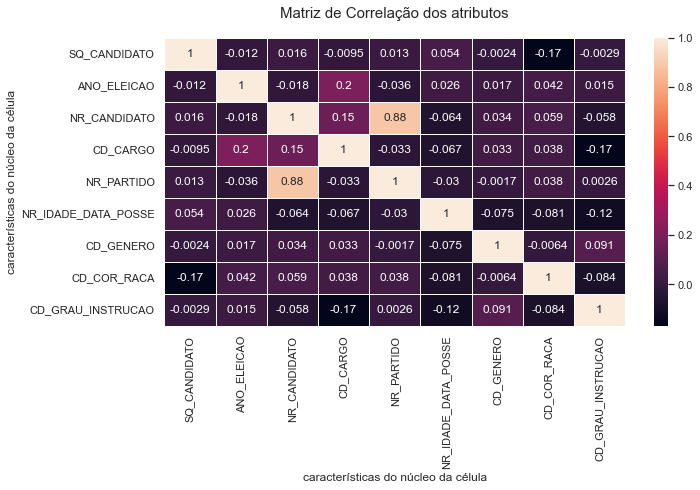

In [92]:
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_candidato.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

In [93]:
data_gd.columns

Index(['SQ_CANDIDATO', 'ANO_ELEICAO', 'NR_CPF_CANDIDATO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'CD_CARGO', 'DS_CARGO', 'NR_PARTIDO', 'SG_PARTIDO',
       'SG_UF', 'DS_SIT_TOT_TURNO', 'NR_IDADE_DATA_POSSE', 'CD_GENERO',
       'DS_GENERO', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'ST_REELEICAO',
       'TP_ABRANGENCIA', 'ST_DECLARAR_BENS', 'DS_GRAU_INSTRUCAO',
       'CD_GRAU_INSTRUCAO', 'DS_SITUACAO_CANDIDATURA', 'DT_NASCIMENTO',
       'CD_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA',
       'VR_DESPESA_MAX_CAMPANHA',
       'DS_MOTIVO_CASSACAO_Ausência de requisito de registro ',
       'DS_MOTIVO_CASSACAO_Compra de voto (Lei 9.504/97).',
       'DS_MOTIVO_CASSACAO_Conduta vedada (Lei 9.504/97).',
       'DS_MOTIVO_CASSACAO_Ficha limpa (LC 64/90)',
       'DS_MOTIVO_CASSACAO_Gasto ilícito de recursos (Lei 9.504/97).',
       'DS_MOTIVO_CASSACAO_Impugnação',
       'DS_MOTIVO_CASSACAO_Indeferimento de partido ou coligação.',
       'DS_MOTIVO_CASSACAO_Partido Invalidado', 'DS_COR

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [95]:
#Variáveis Continuas
x_cont  = ['ST_REELEICAO','DS_CARGO','DS_ESTADO_CIVIL','DS_SIT_TOT_TURNO','VR_DESPESA_MAX_CAMPANHA','NR_IDADE_DATA_POSSE','SG_PARTIDO','DS_CARGO','TP_ABRANGENCIA']


In [96]:
#Variáveis Categóricas
x_cat = list(set(data_gd) - set(x_cont))
x_dummies = data_gd[x_cat]

In [97]:
data_gd

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,DS_MOTIVO_CASSACAO_Gasto ilícito de recursos (Lei 9.504/97).,DS_MOTIVO_CASSACAO_Impugnação,DS_MOTIVO_CASSACAO_Indeferimento de partido ou coligação.,DS_MOTIVO_CASSACAO_Partido Invalidado,DS_COR_RACA_BRANCA,DS_COR_RACA_INDÍGENA,DS_COR_RACA_NÃO DIVULGÁVEL,DS_COR_RACA_NÃO INFORMADO,DS_COR_RACA_PARDA,DS_COR_RACA_PRETA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,0,0,0,0,0,0,0,0,1,0
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,0,0,0,0,0,0,0,0,1,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,0,0,0,0,1,0,0,0,0,0
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,0,0,0,0,0,0,0,0,1,0
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,VEREADOR,11,PP,MG,...,0,0,0,0,0,0,0,0,1,0
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,VICE-PREFEITO,11,PP,MA,...,0,0,0,0,0,0,0,0,0,1
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,VEREADOR,11,PP,PB,...,0,0,0,0,0,0,0,0,1,0
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,VEREADOR,70,AVANTE,RJ,...,0,0,0,0,0,0,0,0,1,0


In [98]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_gd['DS_SIT_TOT_TURNO'] = le.fit_transform(data_gd['DS_SIT_TOT_TURNO']) 
data_gd.head(10)

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,...,DS_MOTIVO_CASSACAO_Gasto ilícito de recursos (Lei 9.504/97).,DS_MOTIVO_CASSACAO_Impugnação,DS_MOTIVO_CASSACAO_Indeferimento de partido ou coligação.,DS_MOTIVO_CASSACAO_Partido Invalidado,DS_COR_RACA_BRANCA,DS_COR_RACA_INDÍGENA,DS_COR_RACA_NÃO DIVULGÁVEL,DS_COR_RACA_NÃO INFORMADO,DS_COR_RACA_PARDA,DS_COR_RACA_PRETA
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,DEPUTADO ESTADUAL,54,PPL,AC,...,0,0,0,0,0,0,0,0,1,0
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,DEPUTADO ESTADUAL,40,PSB,AC,...,0,0,0,0,0,0,0,0,1,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,DEPUTADO ESTADUAL,11,PP,AC,...,0,0,0,0,1,0,0,0,0,0
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,DEPUTADO ESTADUAL,43,PV,AC,...,0,0,0,0,0,0,0,0,1,0
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,DEPUTADO ESTADUAL,43,PV,AC,...,0,0,0,0,1,0,0,0,0,0
5,1410065687,2014,21617015253,19012,MARISELVA PEREIRA DOS SANTOS,7,DEPUTADO ESTADUAL,19,PTN,AC,...,0,0,0,0,0,0,0,0,1,0
6,1410065510,2014,47768258215,44666,MAGID KASSEN MASTUB NETO,7,DEPUTADO ESTADUAL,44,PRP,AC,...,0,0,0,0,0,0,0,0,1,0
7,1410065943,2014,16451724220,15999,ESPERIDIÃO MENEZES JUNIOR,7,DEPUTADO ESTADUAL,15,PMDB,AC,...,0,0,0,0,0,0,0,0,1,0
8,1410065831,2014,19691394200,27123,MANOEL LOPES DA SILVA,7,DEPUTADO ESTADUAL,27,PSDC,AC,...,0,0,0,0,0,0,0,0,1,0
9,1410065602,2014,52775364268,13420,CAIO CESAR PEREIRA PINHEIRO,7,DEPUTADO ESTADUAL,13,PT,AC,...,0,0,0,0,0,0,0,0,1,0


In [99]:
#https://datagy.io/pandas-get-dummies/

In [100]:
x_final = pd.get_dummies(data = data_gd, 
                          columns = ['SG_UF','DS_SIT_TOT_TURNO','DS_GRAU_INSTRUCAO','SG_PARTIDO','DS_CARGO','TP_ABRANGENCIA'],
                          prefix_sep='_',
                          dummy_na=False,
                          sparse=False,
                          drop_first=False,
                          dtype=None
                         )
x_final

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,NR_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,...,DS_CARGO_PREFEITO,DS_CARGO_PRESIDENTE,DS_CARGO_SENADOR,DS_CARGO_VEREADOR,DS_CARGO_VICE-GOVERNADOR,DS_CARGO_VICE-PREFEITO,DS_CARGO_VICE-PRESIDENTE,TP_ABRANGENCIA_ESTADUAL,TP_ABRANGENCIA_FEDERAL,TP_ABRANGENCIA_MUNICIPAL
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,54,42.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,40,43.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,11,46.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,43,29.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,43,37.0,4,FEMININO,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,11,22.0,4,FEMININO,...,0,0,0,1,0,0,0,0,0,1
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,11,71.0,2,MASCULINO,...,0,0,0,0,0,1,0,0,0,1
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,11,38.0,2,MASCULINO,...,0,0,0,1,0,0,0,0,0,1
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,70,28.0,4,FEMININO,...,0,0,0,1,0,0,0,0,0,1


In [101]:
x_dummies.head(8)

,NR_PARTIDO,DT_NASCIMENTO,DS_COR_RACA_PARDA,ST_DECLARAR_BENS,CD_GRAU_INSTRUCAO,CD_GENERO,DS_SITUACAO_CANDIDATURA,NR_CANDIDATO,DS_MOTIVO_CASSACAO_Ficha limpa (LC 64/90),CD_CARGO,...,DS_COR_RACA_INDÍGENA,DS_COR_RACA_PRETA,DS_COR_RACA_NÃO INFORMADO,DS_GRAU_INSTRUCAO,DS_GENERO,DS_MOTIVO_CASSACAO_Impugnação,DS_MOTIVO_CASSACAO_Indeferimento de partido ou coligação.,DS_COR_RACA_NÃO DIVULGÁVEL,DS_MOTIVO_CASSACAO_Ausência de requisito de registro,DS_MOTIVO_CASSACAO_Conduta vedada (Lei 9.504/97).
0,54,16/09/1972,1,S,7,2,APTO,54444,0,7,...,0,0,0,SUPERIOR INCOMPLETO,MASCULINO,0,0,0,0,0
1,40,06/04/1971,1,S,4,2,APTO,40140,0,7,...,0,0,0,ENSINO FUNDAMENTAL COMPLETO,MASCULINO,0,0,0,0,0
2,11,16/09/1968,0,S,2,2,APTO,11223,0,7,...,0,0,0,LÊ E ESCREVE,MASCULINO,0,0,0,0,0
3,43,01/10/1985,1,S,8,2,APTO,43777,0,7,...,0,0,0,SUPERIOR COMPLETO,MASCULINO,0,0,0,0,0
4,43,19/04/1977,0,N,8,4,APTO,43250,0,7,...,0,0,0,SUPERIOR COMPLETO,FEMININO,0,0,0,0,0
5,19,05/01/1965,1,N,4,4,APTO,19012,0,7,...,0,0,0,ENSINO FUNDAMENTAL COMPLETO,FEMININO,0,0,0,0,0
6,44,21/12/1974,1,N,6,2,APTO,44666,0,7,...,0,0,0,ENSINO MÉDIO COMPLETO,MASCULINO,0,0,0,0,0
7,15,03/09/1963,1,N,8,2,APTO,15999,0,7,...,0,0,0,SUPERIOR COMPLETO,MASCULINO,0,0,0,0,0


In [102]:
x_dummies.columns

Index(['NR_PARTIDO', 'DT_NASCIMENTO', 'DS_COR_RACA_PARDA', 'ST_DECLARAR_BENS',
       'CD_GRAU_INSTRUCAO', 'CD_GENERO', 'DS_SITUACAO_CANDIDATURA',
       'NR_CANDIDATO', 'DS_MOTIVO_CASSACAO_Ficha limpa (LC 64/90)', 'CD_CARGO',
       'SQ_CANDIDATO', 'NM_CANDIDATO', 'DS_COR_RACA_BRANCA', 'ANO_ELEICAO',
       'CD_COR_RACA', 'CD_SITUACAO_CANDIDATO_URNA', 'NR_CPF_CANDIDATO',
       'DS_MOTIVO_CASSACAO_Compra de voto (Lei 9.504/97).',
       'DS_MOTIVO_CASSACAO_Gasto ilícito de recursos (Lei 9.504/97).',
       'ST_CANDIDATO_INSERIDO_URNA', 'SG_UF',
       'DS_MOTIVO_CASSACAO_Partido Invalidado', 'DS_COR_RACA_INDÍGENA',
       'DS_COR_RACA_PRETA', 'DS_COR_RACA_NÃO INFORMADO', 'DS_GRAU_INSTRUCAO',
       'DS_GENERO', 'DS_MOTIVO_CASSACAO_Impugnação',
       'DS_MOTIVO_CASSACAO_Indeferimento de partido ou coligação.',
       'DS_COR_RACA_NÃO DIVULGÁVEL',
       'DS_MOTIVO_CASSACAO_Ausência de requisito de registro ',
       'DS_MOTIVO_CASSACAO_Conduta vedada (Lei 9.504/97).'],
      dtype='ob

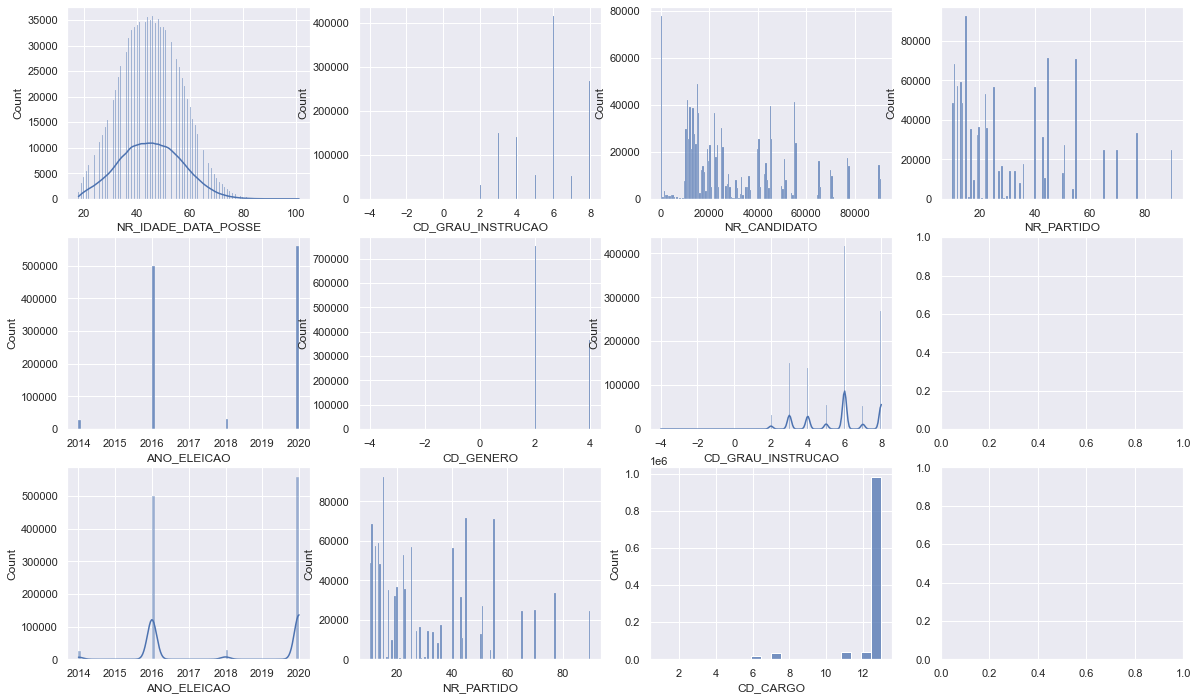

In [103]:
# Distributions of the features
fig, ax = plt.subplots(3, 4, figsize=(20, 12))
sns.histplot(df_candidato_cassacao['NR_IDADE_DATA_POSSE'], kde=True, ax=ax[0, 0])
sns.histplot(df_candidato_cassacao['CD_GRAU_INSTRUCAO'], ax=ax[0, 1])
sns.histplot(df_candidato_cassacao['NR_CANDIDATO'], ax=ax[0, 2])
sns.histplot(df_candidato_cassacao['NR_PARTIDO'], ax=ax[0, 3])
sns.histplot(df_candidato_cassacao['ANO_ELEICAO'], ax=ax[1, 0])
sns.histplot(df_candidato_cassacao['CD_GENERO'], ax=ax[1, 1])
sns.histplot(df_candidato_cassacao['CD_GRAU_INSTRUCAO'], kde=True, ax=ax[1, 2])
sns.histplot(df_candidato_cassacao['ANO_ELEICAO'], kde=True, ax=ax[2, 0])
sns.histplot(df_candidato_cassacao['NR_PARTIDO'], ax=ax[2, 1])
sns.histplot(df_candidato_cassacao['CD_CARGO'], ax=ax[2, 2])
plt.show()

<b> DADOS </b>

In [104]:
df = x_final.copy()

In [105]:
df.columns

Index(['SQ_CANDIDATO', 'ANO_ELEICAO', 'NR_CPF_CANDIDATO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'CD_CARGO', 'NR_PARTIDO', 'NR_IDADE_DATA_POSSE',
       'CD_GENERO', 'DS_GENERO',
       ...
       'DS_CARGO_PREFEITO', 'DS_CARGO_PRESIDENTE', 'DS_CARGO_SENADOR',
       'DS_CARGO_VEREADOR', 'DS_CARGO_VICE-GOVERNADOR',
       'DS_CARGO_VICE-PREFEITO', 'DS_CARGO_VICE-PRESIDENTE',
       'TP_ABRANGENCIA_ESTADUAL', 'TP_ABRANGENCIA_FEDERAL',
       'TP_ABRANGENCIA_MUNICIPAL'],
      dtype='object', length=139)

In [106]:
df

,SQ_CANDIDATO,ANO_ELEICAO,NR_CPF_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,CD_CARGO,NR_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,...,DS_CARGO_PREFEITO,DS_CARGO_PRESIDENTE,DS_CARGO_SENADOR,DS_CARGO_VEREADOR,DS_CARGO_VICE-GOVERNADOR,DS_CARGO_VICE-PREFEITO,DS_CARGO_VICE-PRESIDENTE,TP_ABRANGENCIA_ESTADUAL,TP_ABRANGENCIA_FEDERAL,TP_ABRANGENCIA_MUNICIPAL
0,1410065661,2014,49513427234,54444,GILDOMAR OLIVEIRA GOMES,7,54,42.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
1,1410065850,2014,43503594272,40140,WILSON DE MELO LUNA,7,40,43.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
2,1410065722,2014,30870968220,11223,KIEFER ROBERTO CAVALCANTE LIMA,7,11,46.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
3,1410065737,2014,76492524268,43777,FRANCINEUDO SOUZA DA COSTA,7,43,29.0,2,MASCULINO,...,0,0,0,0,0,0,0,0,1,0
4,1410065799,2014,51344840230,43250,MICHELE SARAIVA SAMPAIO,7,43,37.0,4,FEMININO,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115067,1151648738,2020,09937138663,11999,GLENDA CARMEN FERREIRA DE ARAÚJO TEIXEIRA,13,11,22.0,4,FEMININO,...,0,0,0,1,0,0,0,0,0,1
1115068,1216568128,2020,06451144304,22,FRANCISCO FERREIRA FILHO,12,11,71.0,2,MASCULINO,...,0,0,0,0,0,1,0,0,0,1
1115069,-323187666,2020,08799779498,11777,ADRIANO DANTAS DA SILVA,13,11,38.0,2,MASCULINO,...,0,0,0,1,0,0,0,0,0,1
1115070,1022113930,2020,11774521709,70704,CINTIA APARECIDA SUDRÉ,13,70,28.0,4,FEMININO,...,0,0,0,1,0,0,0,0,0,1


In [107]:
X_df = df[['NR_PARTIDO', 'NR_PARTIDO','CD_CARGO','NR_IDADE_DATA_POSSE','ANO_ELEICAO']]
Y_df = df['ANO_ELEICAO']

Xdummies_df = pd.get_dummies(X_df)
Ydummies_df = Y_df

X = Xdummies_df.values
Y = Ydummies_df.values

porcentagem_de_treino = 0.8
porcentagem_de_teste = 0.1

tamanho_de_treino = int(porcentagem_de_treino * len(Y))
tamanho_de_teste = int(porcentagem_de_teste * len(Y))
tamanho_de_validacao = len(Y) - tamanho_de_treino - tamanho_de_teste

treino_dados = X[:tamanho_de_treino]
treino_marcacoes = Y[:tamanho_de_treino]

fim_de_treino = tamanho_de_treino + tamanho_de_teste

teste_dados = X[tamanho_de_treino:fim_de_treino]
teste_marcacoes = Y[tamanho_de_treino:fim_de_treino]

validacao_dados = X[fim_de_treino:]
validacao_marcacoes = Y[fim_de_treino:]

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

In [109]:
def fit_and_predict(nome, modelo, X_train, Y_train, teste_dados, teste_marcacoes):
    modelo.fit(X_train, Y_train) 
    
    #Testa para ver a sua veracidade
    predictions = modelo.predict(teste_dados)
    print(confusion_matrix(teste_marcacoes, predictions))
    print(classification_report(teste_marcacoes, predictions))

    #Salva para uso futuro
    filename = 'binary_class_model.sav'
    #dump(modelo, open(filename, 'wb'))

    #Le o arquivo do disco
    #loaded_model = load(open('binary_class_model.sav', 'rb'))
    
    resultado = modelo.predict(teste_dados)
    acertos = resultado == teste_marcacoes
    total_de_acertos = sum(acertos)
    total_de_elementos = len(teste_dados)
    taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos
    msg = "Taxa de acerto do algoritmo {0}: {1}".format(nome, taxa_de_acerto)
    print(msg)
    return taxa_de_acerto


def teste_real(modelo, validacao_dados, validacao_marcacoes):
    resultado = modelo.predict(validacao_dados)
    acertos = resultado == validacao_marcacoes
    total_de_acertos = sum(acertos)
    total_de_elementos = len(validacao_marcacoes)
    taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos
    msg = "Taxa de acerto do vencedor entre os dois algoritmos no mundo real: {0}".format(taxa_de_acerto)
    print(msg)

In [110]:
resultados = {}

In [111]:
#Ajuste do Modelo KNN - https://github.com/alura-cursos/machine-learning-introducao-a-classificacao-2/blob/master/situacao_do_cliente.py
from sklearn.neighbors import KNeighborsClassifier #classificador
knn = KNeighborsClassifier()
knn.fit(treino_dados, treino_marcacoes)
resultado_knn = knn.predict(teste_dados)    

resultado_knn

array([2020, 2020, 2020, ..., 2020, 2020, 2020])

In [112]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
resultadoOneVsRest = fit_and_predict("OneVsRest", modeloOneVsRest, treino_dados, treino_marcacoes, teste_dados, teste_marcacoes)
resultados[resultadoOneVsRest] = modeloOneVsRest

[[     0      0]
 [111507      0]]
              precision    recall  f1-score   support

        2016       0.00      0.00      0.00       0.0
        2020       0.00      0.00      0.00  111507.0

    accuracy                           0.00  111507.0
   macro avg       0.00      0.00      0.00  111507.0
weighted avg       0.00      0.00      0.00  111507.0

Taxa de acerto do algoritmo OneVsRest: 0.0


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state=0))
resultadoOneVsOne = fit_and_predict("OneVsOne", modeloOneVsOne, treino_dados, treino_marcacoes, teste_dados, teste_marcacoes)
resultados[resultadoOneVsOne] = modeloOneVsOne

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()
resultadoMultinomial = fit_and_predict("MultinomialNB", modeloMultinomial, treino_dados, treino_marcacoes, teste_dados, teste_marcacoes)
resultados[resultadoMultinomial] = modeloMultinomial

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
modeloAdaBoost = AdaBoostClassifier()
resultadoAdaBoost = fit_and_predict("AdaBoostClassifier", modeloAdaBoost, treino_dados, treino_marcacoes, teste_dados, teste_marcacoes)
resultados[resultadoAdaBoost] = modeloAdaBoost

In [ ]:
print (resultados)
maximo = max(resultados)
vencedor = resultados[maximo]
print (vencedor)

resultado = vencedor.predict(validacao_dados)
acertos = (resultado == validacao_marcacoes)

total_de_acertos = sum(acertos)
total_de_elementos = len(validacao_marcacoes)
taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos

msg = "Taxa de acerto do vencedor entre os dois algoritmos no mundo real: {0}".format(taxa_de_acerto)
print(msg)

In [ ]:
print(resultados)
maximo = max(resultados)
vencedor = resultados[maximo]
print("VENCEDOR:", vencedor)

In [ ]:
# precisa fazer o FIT pois o FIT foi excluido pois não fazemos mais o treino
vencedor.fit(treino_dados, treino_marcacoes)

teste_real(vencedor, validacao_dados, validacao_marcacoes)

print("Elementos testados: %d " % len(validacao_dados))

In [ ]:
#Salva para uso futuro
filename = 'binary_class_model.sav'
dump(resultadoAdaBoost, open(filename, 'wb'))

#Le o arquivo do disco
loaded_model = load(open('binary_class_model.sav', 'rb'))

In [ ]:
import seaborn as sns # statistical visualization

In [ ]:
(df_candidato_cassacao.isnull().sum() / df_candidato_cassacao.shape[0] * 100).sort_values(ascending=False)

In [ ]:
#quantidade de valores únicos por cada coluna.
df_candidato_cassacao.nunique().sort_values()

In [ ]:
# describing categorical features
df_candidato_cassacao.describe(include=['O'])

In [ ]:
# plotting this correlation between features
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(data=df_candidato_cassacao.corr().round(2), annot=True, cmap="PiYG", ax=ax)

In [ ]:
# pair plot diagnosis + 10 features (mean)
sns.pairplot(data=df_candidato_cassacao.iloc[:,0:11], hue='NR_PARTIDO', diag_kind='kde')

In [ ]:
# plotting this correlation between features
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(data=df_candidato.corr().round(2), annot=True, cmap="PiYG", ax=ax)

In [ ]:
df.values